In [1]:
# !pip install wbgapi
# !pip install plotly==4.14.3

In [2]:
import wbgapi as wb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

from matplotlib import cm
#import scipy.stats as st
#from scipy.stats import mstats
#import statsmodels 
#import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import plotly.offline as py #이거 수업시간 사용 안함. 
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go #이거는 수업시간에 사용함 
import plotly.tools as tls #이것도 사용 안함. 


In [3]:
# wb.series.info()

In [4]:
# Total greenhouse gas emissions (kt of CO2 equivalent)
greenhouse = wb.data.DataFrame('EN.ATM.GHGT.KT.CE').loc['WLD', 'YR1990':'YR2018']

greenhouse = pd.DataFrame(greenhouse)
greenhouse_index = []
for year in greenhouse.index:
    greenhouse_index.append(int(year.replace('YR','')))

greenhouse.reindex(greenhouse_index)
greenhouse.index = greenhouse_index

In [5]:
# ARCTIC SEA ICE EXTENT
arctic_extent = pd.read_excel('./dataset/2485_Sept_Arctic_extent_1979-2021.xlsx', index_col=0)
arctic_extent = arctic_extent.set_index('year')
# OCEAN HEAT CONTENT
ocean_heat = pd.read_table('./dataset/pent_h22-w0-2000m.dat.txt')

# Global Temperature
temperature = pd.read_table('./dataset/graph.txt')

In [6]:
# temperature, ocean heat 데이터프레임 형태로 전처리

oceanList = []
ocean_col = [x for x in ocean_heat.columns[0].split(' ') if x!='']
for i in range(len(ocean_heat)):
    oceanList.append([x for x in ocean_heat.loc[i][0].split(' ') if x!=''])

ocean_heat = pd.DataFrame(oceanList, columns=ocean_col)

ocean_heat.rename(columns={'YEAR':'year'}, inplace=True)
ocean_heat = ocean_heat.astype('float')
ocean_heat.year = ocean_heat.year.astype('int')
ocean_heat = ocean_heat.set_index('year')



tempList = []
temp_col = [x for x in temperature.loc[1][0].split(' ') if x!='']
for i in range(3, len(temperature)):
    tempList.append([x for x in temperature.loc[i][0].split(' ') if x!=''])

temperature = pd.DataFrame(tempList, columns=temp_col)
temperature = temperature.astype('float')
temperature.Year = temperature.Year.astype('int')
temperature = temperature.set_index('Year')

# 기후 변화란?

Text(0.5, 1.0, 'ARCTIC SEA ICE EXTENT')

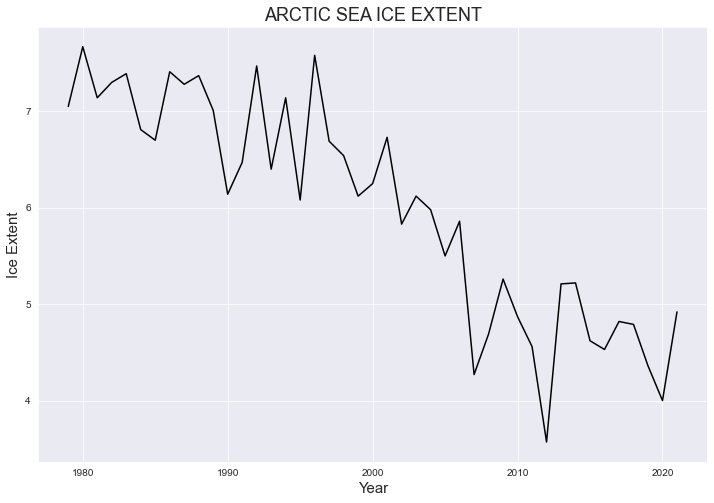

In [7]:
# 북반구 해빙 면적
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")

p = sns.lineplot(x = arctic_extent.index, y = arctic_extent['extent'], color = 'black')
p.set_xlabel('Year', fontsize=15)
p.set_ylabel('Ice Extent', fontsize=15)
p.set_title('ARCTIC SEA ICE EXTENT', fontsize=18)

Text(0, 0.5, 'Heat Content (10^22 Joules)')

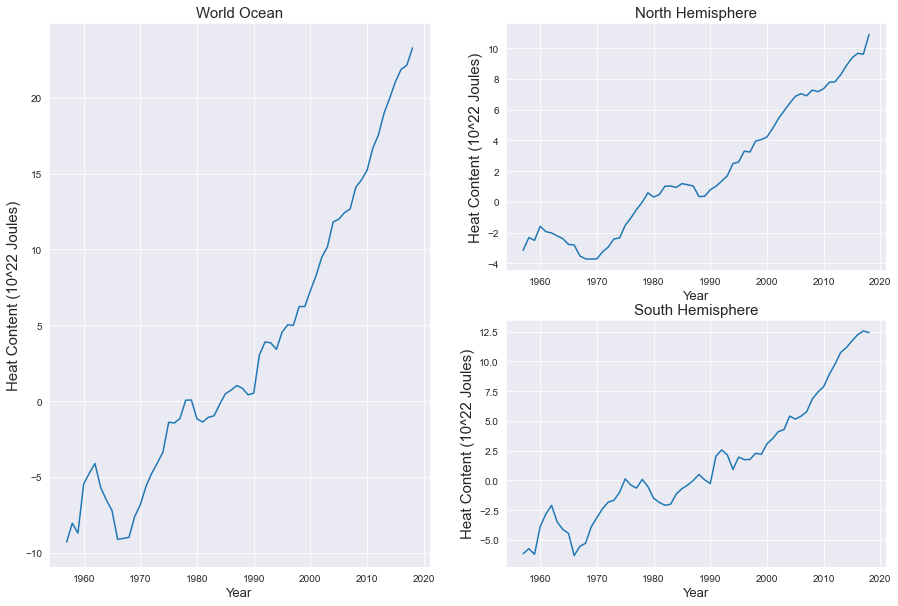

In [8]:
# 해수 온도
fig = plt.figure(figsize=(15, 10))

gs = mpl.gridspec.GridSpec(2, 2)

ax0 = fig.add_subplot(gs[0:, 0])
ax0.plot(ocean_heat.WO)
ax0.set_title('World Ocean', fontsize=15)
ax0.set_xlabel('Year', fontsize=13)
ax0.set_ylabel('Heat Content (10^22 Joules)', fontsize=15)

ax1 = fig.add_subplot(gs[0, 1])
ax1.plot(ocean_heat.NH)
ax1.set_title('North Hemisphere', fontsize=15)
ax1.set_xlabel('Year', fontsize=13)
ax1.set_ylabel('Heat Content (10^22 Joules)', fontsize=15)


ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(ocean_heat.SH)
ax2.set_title('South Hemisphere', fontsize=15)
ax2.set_xlabel('Year', fontsize=13)
ax2.set_ylabel('Heat Content (10^22 Joules)', fontsize=15)

# 지구 온난화란?

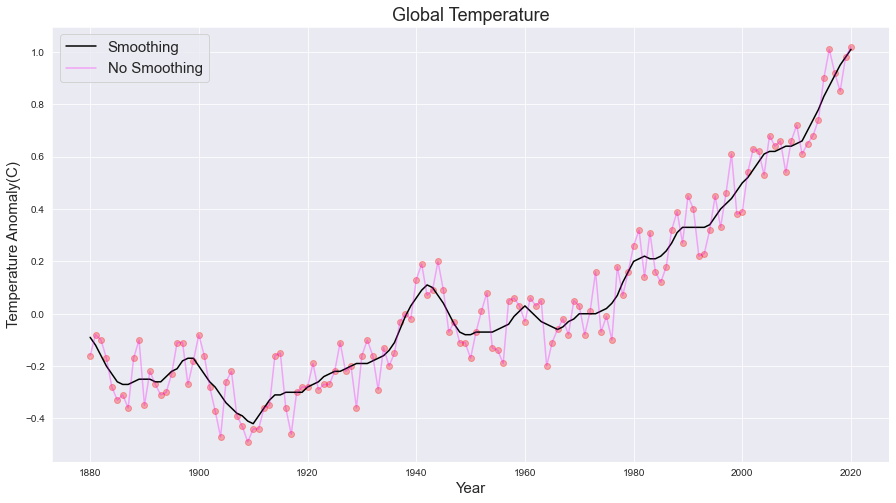

In [9]:
# 세계 기온
plt.figure(figsize=(15,8))

plt.plot(temperature['Lowess(5)'], color = 'black', label = 'Smoothing')
plt.plot(temperature['No_Smoothing'], color='magenta', alpha=0.3, label = 'No Smoothing')
plt.scatter(x=temperature.index, y=temperature['No_Smoothing'], color='red', alpha=0.3, label=None)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Temperature Anomaly(C)', fontsize=15)
plt.title('Global Temperature', fontsize=18)


plt.legend(fontsize=15)

# 온실가스 배출량

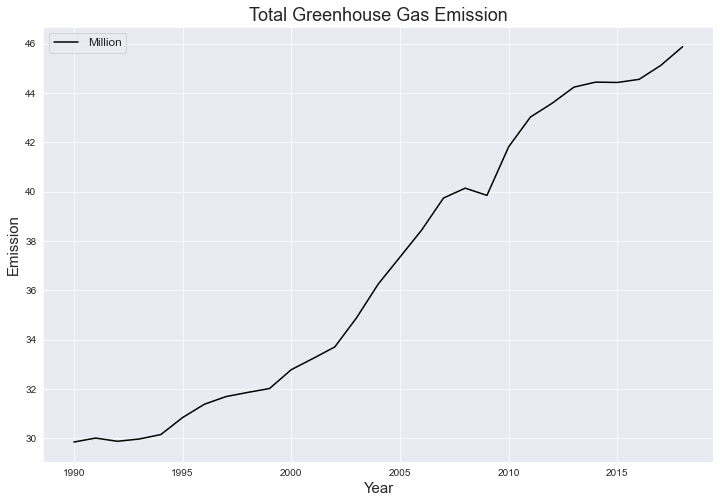

In [10]:
# 세계 온실가스 배출량
plt.figure(figsize=(12,8))

p = sns.lineplot(x = greenhouse.index, y = greenhouse.loc[:,'WLD']/1000000, color = 'black', label = 'Million')
p.set_xlabel('Year', fontsize=15)
p.set_ylabel('Emission', fontsize=15)
p.set_title('Total Greenhouse Gas Emission', fontsize=18)
plt.legend(fontsize=12)

# CO2

In [11]:
#전처리 위한 함수 생성 

def change_col(cols):
    cols = cols.str.strip().str.lower().str.replace(" ", "_").str.replace('(', '').str.replace(')', '')
    return cols

In [12]:
co2_meta_data=pd.read_csv('./dataset/Metadata_Country_API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3159085-co2emissions(kt).csv')
co2_meta_data.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [13]:
co2_meta_data.shape

(265, 6)

In [14]:
co2_value_data=pd.read_csv('./dataset/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3159085-co2emissions(kt).csv')
co2_value_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN


In [15]:
co2_meta_data.drop(columns=['SpecialNotes','TableName','Unnamed: 5'],axis=1,inplace=True)

In [16]:
co2_value_data.drop(columns=['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [17]:
print(co2_meta_data.shape)
print(co2_value_data.shape)

(265, 3)
(266, 63)


In [18]:
co2_meta_data.columns = change_col(co2_meta_data.columns)
co2_value_data.columns = change_col(co2_value_data.columns)

In [19]:
co2_value_data.iloc[:,2:] = co2_value_data.iloc[:,2:].fillna(method='bfill',axis=1)
f_co2_value_data = co2_value_data
#final_co2_value_data=f_co2_value_data.fillna(method='bfill',axis=0,inplace=True)

In [20]:
f_co2_value_data.head(5)

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,9933.9030,12236.7790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,157932.2573,165066.0405,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,1092.7660,1283.4500,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,21246.5980,21239.2640,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,1554.8080,993.7570,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN


In [21]:
f_co2_value_data.iloc[:,2:] = f_co2_value_data.iloc[:,2:].fillna(method='ffill',axis=1)
final_co2_value_data =f_co2_value_data

In [22]:
final_co2_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1960          250 non-null    float64
 3   1961          250 non-null    float64
 4   1962          250 non-null    float64
 5   1963          250 non-null    float64
 6   1964          250 non-null    float64
 7   1965          250 non-null    float64
 8   1966          250 non-null    float64
 9   1967          250 non-null    float64
 10  1968          250 non-null    float64
 11  1969          250 non-null    float64
 12  1970          250 non-null    float64
 13  1971          250 non-null    float64
 14  1972          250 non-null    float64
 15  1973          250 non-null    float64
 16  1974          250 non-null    float64
 17  1975          250 non-null    float64
 18  1976          250 non-null    

In [23]:
final_co2_value_data.drop(['2019','2020'],axis=1,inplace=True)

In [24]:
final_co2_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 61 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1960          250 non-null    float64
 3   1961          250 non-null    float64
 4   1962          250 non-null    float64
 5   1963          250 non-null    float64
 6   1964          250 non-null    float64
 7   1965          250 non-null    float64
 8   1966          250 non-null    float64
 9   1967          250 non-null    float64
 10  1968          250 non-null    float64
 11  1969          250 non-null    float64
 12  1970          250 non-null    float64
 13  1971          250 non-null    float64
 14  1972          250 non-null    float64
 15  1973          250 non-null    float64
 16  1974          250 non-null    float64
 17  1975          250 non-null    float64
 18  1976          250 non-null    

In [25]:
final_co2_value_data[~final_co2_value_data.country_code.isin(co2_meta_data.country_code)]

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
110,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
index_drop_co2=final_co2_value_data[~final_co2_value_data.country_code.isin(co2_meta_data.country_code)].index
print(index_drop_co2)

Int64Index([110], dtype='int64')


In [27]:
final_co2_value_data.drop(index_drop_co2,inplace=True)

In [28]:
co2_mergedData = pd.merge(co2_meta_data, final_co2_value_data, on=["country_code"], how="inner")
co2_mergedData

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,649.0590,649.0590,649.0590,649.0590,649.059,649.059,649.059,649.059,649.0590,649.0590
1,AFE,NaN,NaN,Africa Eastern and Southern,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,AFG,South Asia,Low income,Afghanistan,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,AFW,NaN,NaN,Africa Western and Central,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,YEM,Middle East & North Africa,Low income,"Yemen, Rep.",58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,...,25650.0000,23990.0000,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000
262,ZAF,Sub-Saharan Africa,Upper middle income,South Africa,97934.5690,102213.9580,105767.2810,109826.6500,119657.8770,128260.6590,...,404020.0000,425110.0000,409120.0000,426710.0000,436870.000,447980.000,424880.000,425180.000,435140.0000,433250.0000
263,ZMB,Sub-Saharan Africa,Lower middle income,Zambia,3278.2980,3278.2980,3278.2980,3278.2980,3278.2980,3916.3560,...,2470.0000,2640.0000,3060.0000,4020.0000,4240.000,4800.000,5070.000,5590.000,6990.0000,7740.0000


In [29]:
co2_mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  265 non-null    object 
 1   region        217 non-null    object 
 2   incomegroup   216 non-null    object 
 3   country_name  265 non-null    object 
 4   1960          250 non-null    float64
 5   1961          250 non-null    float64
 6   1962          250 non-null    float64
 7   1963          250 non-null    float64
 8   1964          250 non-null    float64
 9   1965          250 non-null    float64
 10  1966          250 non-null    float64
 11  1967          250 non-null    float64
 12  1968          250 non-null    float64
 13  1969          250 non-null    float64
 14  1970          250 non-null    float64
 15  1971          250 non-null    float64
 16  1972          250 non-null    float64
 17  1973          250 non-null    float64
 18  1974          250 non-null    

In [30]:
co2_mergedData.head()

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,649.0590,649.0590,649.0590,649.0590,649.059,649.059,649.059,649.059,649.0590,649.0590
1,AFE,NaN,NaN,Africa Eastern and Southern,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,AFG,South Asia,Low income,Afghanistan,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,AFW,NaN,NaN,Africa Western and Central,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000


In [31]:
co2_mergedData.columns

Index(['country_code', 'region', 'incomegroup', 'country_name', '1960', '1961',
       '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979',
       '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018'],
      dtype='object')

In [32]:
year_data_co2=co2_mergedData.iloc[:,4:]
year_data_co2

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,9933.9030,12236.7790,11378.7010,14891.6870,...,649.0590,649.0590,649.0590,649.0590,649.059,649.059,649.059,649.059,649.0590,649.0590
1,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,157932.2573,165066.0405,174004.8927,182939.9843,...,515682.5438,543808.6518,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333
2,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,1092.7660,1283.4500,1224.7780,942.4190,...,6000.0000,8670.0000,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000
3,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,21246.5980,21239.2640,16527.1690,23743.8250,...,145550.0000,165750.0000,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000
4,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,1554.8080,993.7570,1672.1520,2786.9200,...,27150.0000,28530.0000,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,58.6720,73.3400,69.6730,80.6740,99.0090,102.6760,99.0090,102.6760,128.3450,135.6790,...,25650.0000,23990.0000,20690.0000,19680.0000,26350.000,26710.000,14210.000,10880.000,10060.0000,9310.0000
262,97934.5690,102213.9580,105767.2810,109826.6500,119657.8770,128260.6590,128356.0010,133885.8370,138084.5520,143280.6910,...,404020.0000,425110.0000,409120.0000,426710.0000,436870.000,447980.000,424880.000,425180.000,435140.0000,433250.0000
263,3278.2980,3278.2980,3278.2980,3278.2980,3278.2980,3916.3560,3501.9850,4792.7690,4572.7490,4275.7220,...,2470.0000,2640.0000,3060.0000,4020.0000,4240.000,4800.000,5070.000,5590.000,6990.0000,7740.0000


In [33]:
#for column in year_data_co2.columns:
#    print(column)

In [34]:
cols=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970',
     '1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
     '1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995',
     '1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
     '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [35]:
zero_list=[]
for col in cols:
    idx=year_data_co2[year_data_co2[col]<0].index
    
    if (len(idx))>0:
        zero_list.append(idx)

In [36]:
zero_list[0][0]

206

In [37]:
co2_mergedData.drop(zero_list[0],inplace=True)

In [38]:
co2_mergedData.shape

(264, 63)

In [39]:
country_list=['Afghanistan','Angola','Albania','Argentina','Armenia','Australia'
,'Austria','Azerbaijan','Burundi','Belgium','Benin','Burkina Faso','Bangladesh','Bulgaria'
,'Bahrain','Bosnia and Herzegovina','Belarus','Belize','Bolivia','Brazil','Barbados','Brunei Darussalam'
,'Bhutan','Botswana','Central African Republic','Canada','Switzerland','Chile','China','Cameroon'
,'Congo','Colombia','Comoros','Cabo Verde','Costa Rica','Cuba','Cyprus','Czech Republic','Germany'
,'Denmark','Dominican Republic','Algeria','Ecuador','Egypt','Spain','Estonia','Ethiopia','Finland','Fiji'
,'France','Gabon','United Kingdom','Georgia','Ghana','Guinea','Greece','Guatemala','Guyana','Hong Kong'
,'Honduras','Croatia','Haiti','Hungary','Indonesia','India','Ireland','Iran','Iraq','Iceland','Israel'
,'Italy','Jamaica','Jordan','Japan','Kazakhstan','Kenya','Cambodia','Korea, Rep.','Kuwait','Lebanon','Liberia'
,'Libya','Sri Lanka','Lesotho','Lithuania','Luxembourg','Latvia','Macao','Morocco','Moldova','Madagascar'
,'Maldives','Mexico','Macedonia','Mali','Malta','Myanmar','Montenegro','Mongolia','Mozambique','Mauritania'
,'Mauritius','Malawi','Malaysia','Namibia','Niger','Nigeria','Nicaragua','Netherlands'
,'Norway','Nepal','New Zealand','Oman','Pakistan','Panama','Peru','Philippines','Papua New Guinea'
,'Poland','Puerto Rico','Portugal','Paraguay','Qatar','Romania','Russian Federation','Rwanda','Saudi Arabia'
,'Sudan','Senegal','Singapore','Solomon Islands','Sierra Leone','El Salvador','Somalia','Serbia','Slovenia'
,'Sweden','Swaziland','Syrian Arab Republic','Chad','Togo','Thailand','Tajikistan','Turkmenistan','Timor-Leste'
,'Trinidad and Tobago','Tunisia','Turkey','Tanzania','Uganda','Ukraine','Uruguay','United States','Uzbekistan'
,'Vietnam','Yemen, Rep.','Congo, Dem. Rep.','Zambia','Zimbabwe'   
]

In [40]:
co2_mergedData=co2_mergedData[co2_mergedData['country_name'].isin(country_list)]
co2_mergedData.shape

(151, 63)

In [41]:
co2_mergedData.head()

,country_code,region,incomegroup,country_name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,AFG,South Asia,Low income,Afghanistan,414.371,491.378,689.396,707.731,839.743,1008.425,...,6000.0,8670.0,12260.0,10450.0,8510.0,7810.0,7990.0,7390.0,7380.0,7440.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,27150.0,28530.0,29460.0,30250.0,32820.0,34630.0,35160.0,35410.0,30840.0,27340.0
5,ALB,Europe & Central Asia,Upper middle income,Albania,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,4320.0,4580.0,5040.0,4580.0,4790.0,5220.0,5070.0,4930.0,5600.0,5560.0
9,ARG,Latin America & Caribbean,Upper middle income,Argentina,48815.104,51180.319,53695.881,50083.886,55727.399,58866.351,...,157440.0,168140.0,177260.0,178530.0,184000.0,179910.0,186090.0,184280.0,180120.0,177410.0
10,ARM,Europe & Central Asia,Upper middle income,Armenia,19850.000,19850.000,19850.000,19850.000,19850.000,19850.000,...,4510.0,4340.0,4940.0,5720.0,5500.0,5480.0,5340.0,5070.0,5320.0,5550.0


In [42]:
co2_merged_clean= pd.melt(co2_mergedData,id_vars = ["country_name","country_code","region","incomegroup"], 
var_name = "year")

In [43]:
co2_merged_clean

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,550.050
2,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1960,48815.104
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1960,19850.000
...,...,...,...,...,...,...
8904,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,112090.000
8905,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,257860.000
8906,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,9310.000
8907,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,7740.000


In [44]:
#---------------------

In [45]:
#2018
data = [ dict(type = 'choropleth',
        autocolorscale = False,
        #colorscale = metricscale1,
        color='continent',
        showscale = True,
        locations = co2_mergedData['country_name'].values,
        z = co2_mergedData['2018'].values,
        locationmode = 'country names',
        text = co2_mergedData['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'CO2 emission')
            )
       ]

layout = dict(
    title = 'World Map of CO2 emission in the Year 2018',
    geo = dict(showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        #type = 'orthographic',
        type='natural earth',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2018')

#metricscale2=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
#              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
#              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
#              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]



#1960
data = [ dict(type = 'choropleth',
        autocolorscale = False,
        #colorscale = metricscale2,
        color='continent',
        showscale = True,
        locations = co2_mergedData['country_name'].values,
        z = co2_mergedData['1960'].values,
        locationmode = 'country names',
        text = co2_mergedData['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'CO2 emission')
            )
       ]

layout = dict(
    title = 'World Map of CO2 emission in the Year 1960',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        #type = 'orthographic',
        type='natural earth',
        rotation = dict(
            lon = 60,
            lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(202, 202, 202)',
                width = '0.05'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap1960')

In [46]:
#----------------------

In [47]:
co2_1960=co2_merged_clean[co2_merged_clean['year']=='1960']
co2_1960

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1960,414.371
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1960,550.050
2,Albania,ALB,Europe & Central Asia,Upper middle income,1960,2024.184
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1960,48815.104
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1960,19850.000
...,...,...,...,...,...,...
146,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,1960,117770.000
147,Vietnam,VNM,East Asia & Pacific,Lower middle income,1960,5944.207
148,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,1960,58.672
149,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1960,3278.298


In [48]:
co2_2018=co2_merged_clean[co2_merged_clean['year']=='2018']
co2_2018

,country_name,country_code,region,incomegroup,year,value
8758,Afghanistan,AFG,South Asia,Low income,2018,7440.0
8759,Angola,AGO,Sub-Saharan Africa,Lower middle income,2018,27340.0
8760,Albania,ALB,Europe & Central Asia,Upper middle income,2018,5560.0
8761,Argentina,ARG,Latin America & Caribbean,Upper middle income,2018,177410.0
8762,Armenia,ARM,Europe & Central Asia,Upper middle income,2018,5550.0
...,...,...,...,...,...,...
8904,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,112090.0
8905,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,257860.0
8906,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,9310.0
8907,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,7740.0


In [49]:
co2_1960_region=co2_1960.groupby('region')['value'].sum()
co2_2018_region=co2_2018.groupby('region')['value'].sum()

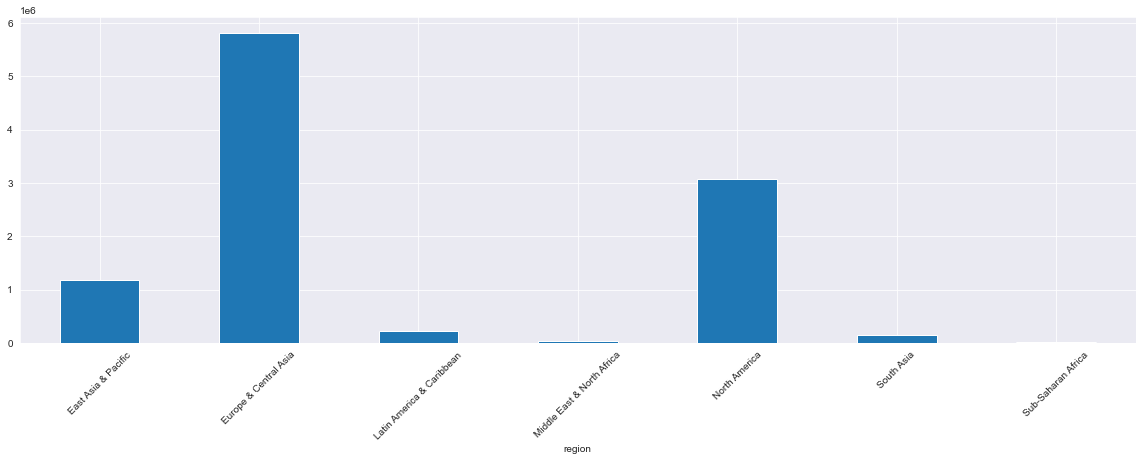

CO2 emissions(region)-1960

region
East Asia & Pacific           1175130.487
Europe & Central Asia         5818799.852
Latin America & Caribbean      228864.804
Middle East & North Africa      45148.104
North America                 3083591.301
South Asia                     151652.452
Sub-Saharan Africa              28773.054
Name: value, dtype: float64


In [50]:
#1960년
plt.figure(figsize = (20,6))
co2_1960_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45)
plt.show()
print("CO2 emissions(region)-1960\n")
print(co2_1960.groupby('region')['value'].sum())

region
East Asia & Pacific           11.157757
Europe & Central Asia         55.248974
Latin America & Caribbean      2.173050
Middle East & North Africa     0.428677
North America                 29.278418
South Asia                     1.439926
Sub-Saharan Africa             0.273198
Name: value, dtype: float64
100.00000000000001


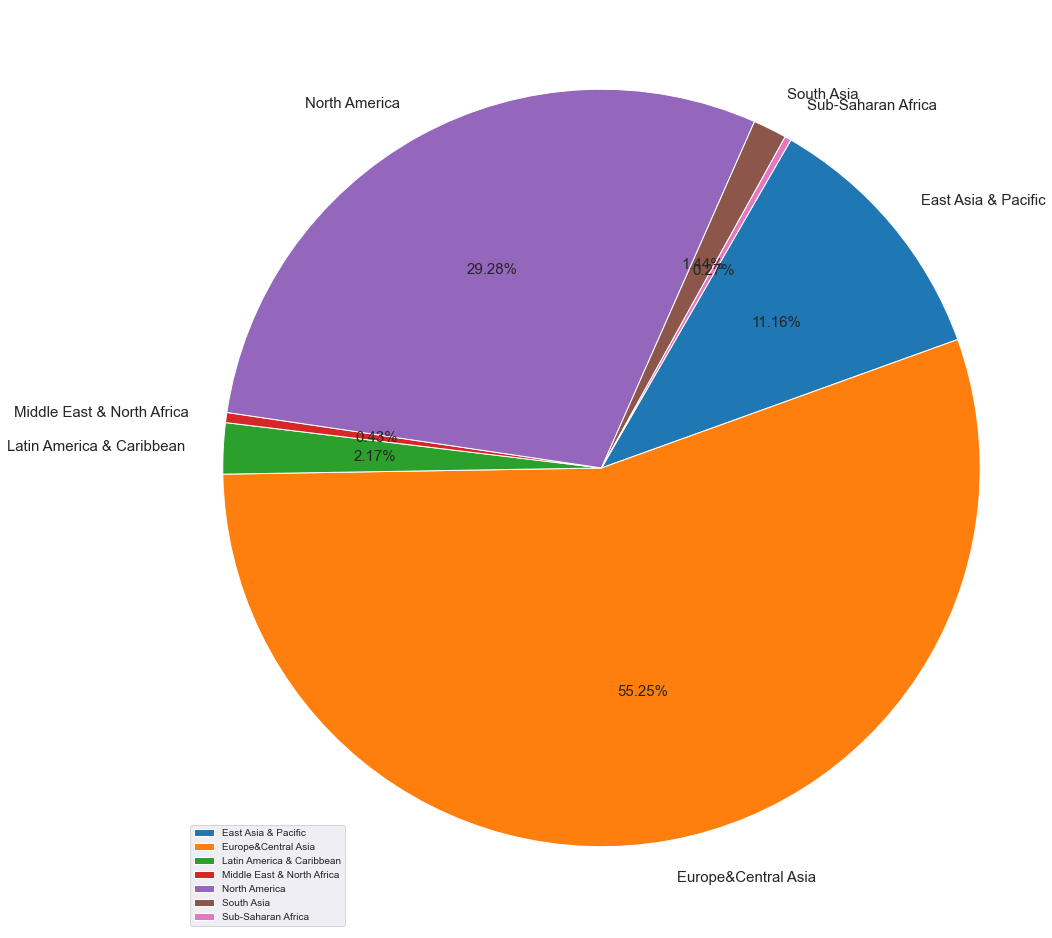

In [51]:
#1960년
total_sum=co2_1960.groupby('region')['value'].sum().sum()
region_sum=co2_1960.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) #100이라고 출력됨.
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
#plt.pie(ratio,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',textprops={'size':40})
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)
 
#plt.figure(figsize=(7,7))
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

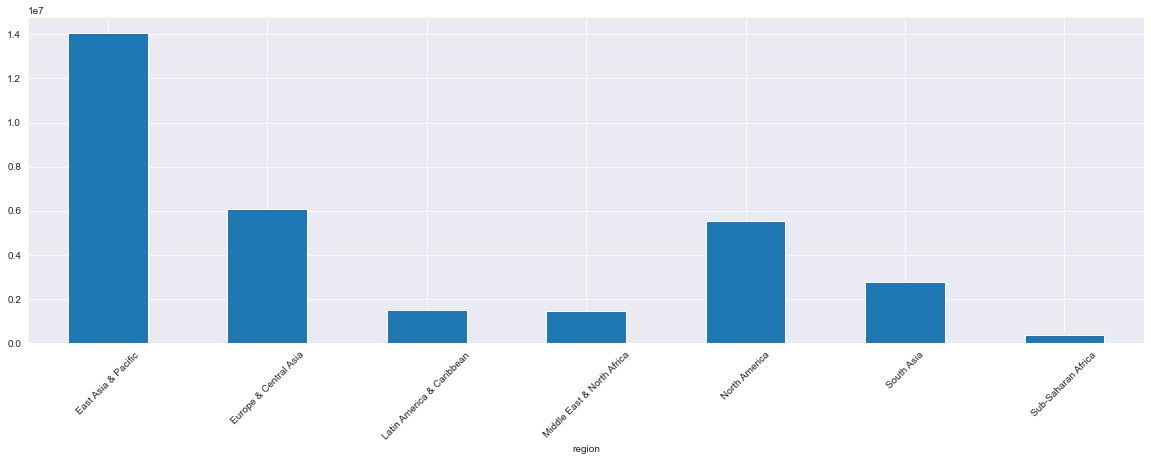

CO2 emissions(region)-2018

region
East Asia & Pacific           14079870.0
Europe & Central Asia          6080860.0
Latin America & Caribbean      1517290.0
Middle East & North Africa     1446910.0
North America                  5555700.0
South Asia                     2770040.0
Sub-Saharan Africa              349340.0
Name: value, dtype: float64


In [52]:
#co2_1960_regionSum=co2_1960.groupby('region')['value'].sum()
#2018년
plt.figure(figsize = (20,6))
co2_2018_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45)
plt.show()
print("CO2 emissions(region)-2018\n")
print(co2_2018.groupby('region')['value'].sum())

No handles with labels found to put in legend.


region
East Asia & Pacific           44.276307
Europe & Central Asia         19.122195
Latin America & Caribbean      4.771351
Middle East & North Africa     4.550030
North America                 17.470749
South Asia                     8.710815
Sub-Saharan Africa             1.098553
Name: value, dtype: float64
100.0


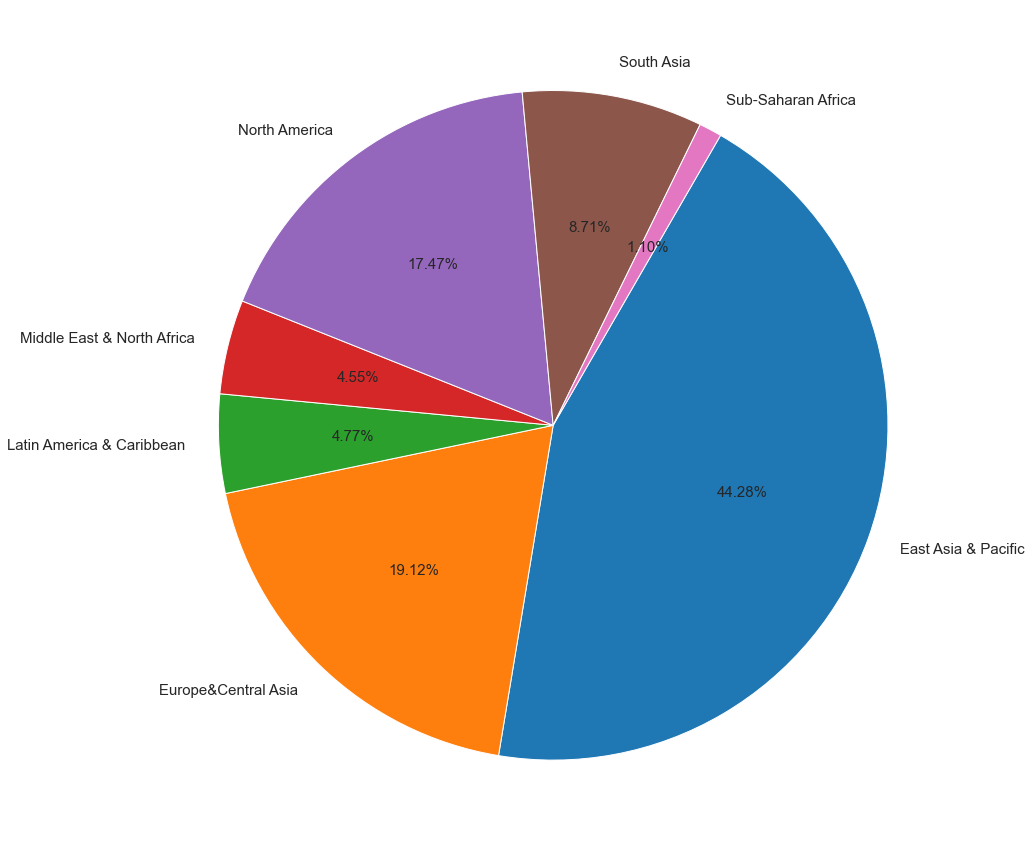

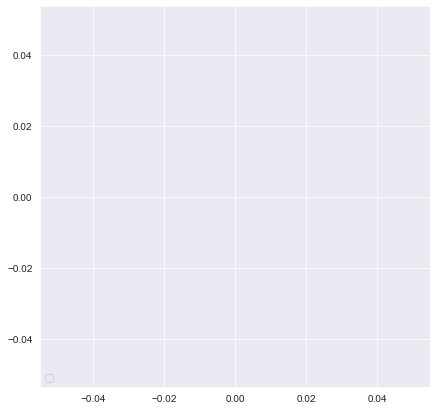

In [53]:
#2018년
total_sum=co2_2018.groupby('region')['value'].sum().sum()
region_sum=co2_2018.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) #100이라고 출력됨.
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
#plt.pie(ratio,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',textprops={'size':40})
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)
 
plt.figure(figsize=(7,7))
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

In [54]:
#2018년 상위 5개 국가를 표현
co2_merged_clean2018=co2_merged_clean[co2_merged_clean.year=='2018'].sort_values('value',ascending=False)
co2_merged_clean2018

,country_name,country_code,region,incomegroup,year,value
8786,China,CHN,East Asia & Pacific,Upper middle income,2018,10313460.0
8903,United States,USA,North America,High income,2018,4981300.0
8820,India,IND,South Asia,Lower middle income,2018,2434520.0
8877,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,1607550.0
8828,Japan,JPN,East Asia & Pacific,High income,2018,1106150.0
...,...,...,...,...,...,...
8766,Burundi,BDI,Sub-Saharan Africa,Low income,2018,590.0
8882,Solomon Islands,SLB,East Asia & Pacific,Lower middle income,2018,370.0
8782,Central African Republic,CAF,Sub-Saharan Africa,Low income,2018,330.0
8790,Comoros,COM,Sub-Saharan Africa,Lower middle income,2018,260.0


In [55]:
top5_co2_2018=co2_merged_clean2018.head(5).country_name[:5]
co2_top5_country=[]
for country in top5_co2_2018:
    co2_top5_country.append(country)
co2_top5_country

['China', 'United States', 'India', 'Russian Federation', 'Japan']

In [56]:
df_new_co2=co2_merged_clean[co2_merged_clean['country_name'].isin(co2_top5_country)]
df_new_co2

,country_name,country_code,region,incomegroup,year,value
28,China,CHN,East Asia & Pacific,Upper middle income,1960,7.807263e+05
62,India,IND,South Asia,Lower middle income,1960,1.205820e+05
70,Japan,JPN,East Asia & Pacific,High income,1960,2.327812e+05
119,Russian Federation,RUS,Europe & Central Asia,Upper middle income,1960,1.448637e+06
145,United States,USA,North America,High income,1960,2.890696e+06
...,...,...,...,...,...,...
8786,China,CHN,East Asia & Pacific,Upper middle income,2018,1.031346e+07
8820,India,IND,South Asia,Lower middle income,2018,2.434520e+06
8828,Japan,JPN,East Asia & Pacific,High income,2018,1.106150e+06
8877,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,1.607550e+06


In [57]:
#상위 top5
df_new_co2.set_index('year',inplace=True)
df_new_co2

,country_name,country_code,region,incomegroup,value
year,,,,,
1960,China,CHN,East Asia & Pacific,Upper middle income,7.807263e+05
1960,India,IND,South Asia,Lower middle income,1.205820e+05
1960,Japan,JPN,East Asia & Pacific,High income,2.327812e+05
1960,Russian Federation,RUS,Europe & Central Asia,Upper middle income,1.448637e+06
1960,United States,USA,North America,High income,2.890696e+06
...,...,...,...,...,...
2018,China,CHN,East Asia & Pacific,Upper middle income,1.031346e+07
2018,India,IND,South Asia,Lower middle income,2.434520e+06
2018,Japan,JPN,East Asia & Pacific,High income,1.106150e+06


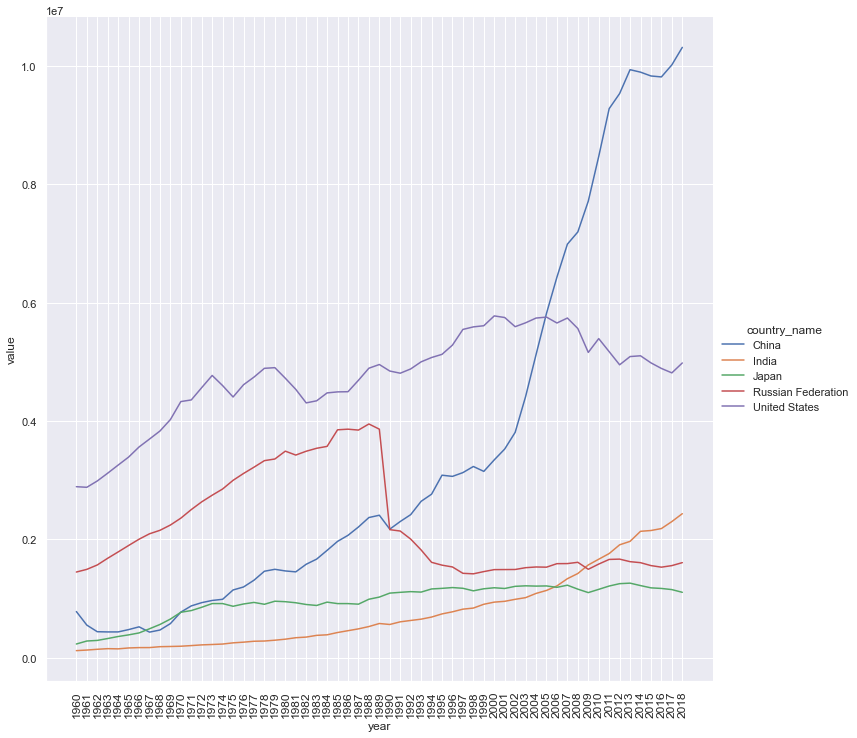

In [58]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.set(font_scale=1)
#sns.set(font_scale=0.5)

g=sns.relplot(x=df_new_co2.index,y=df_new_co2.value,hue=df_new_co2.country_name,height=10,kind='line')
plt.xticks(size=12,rotation=90)
plt.show()

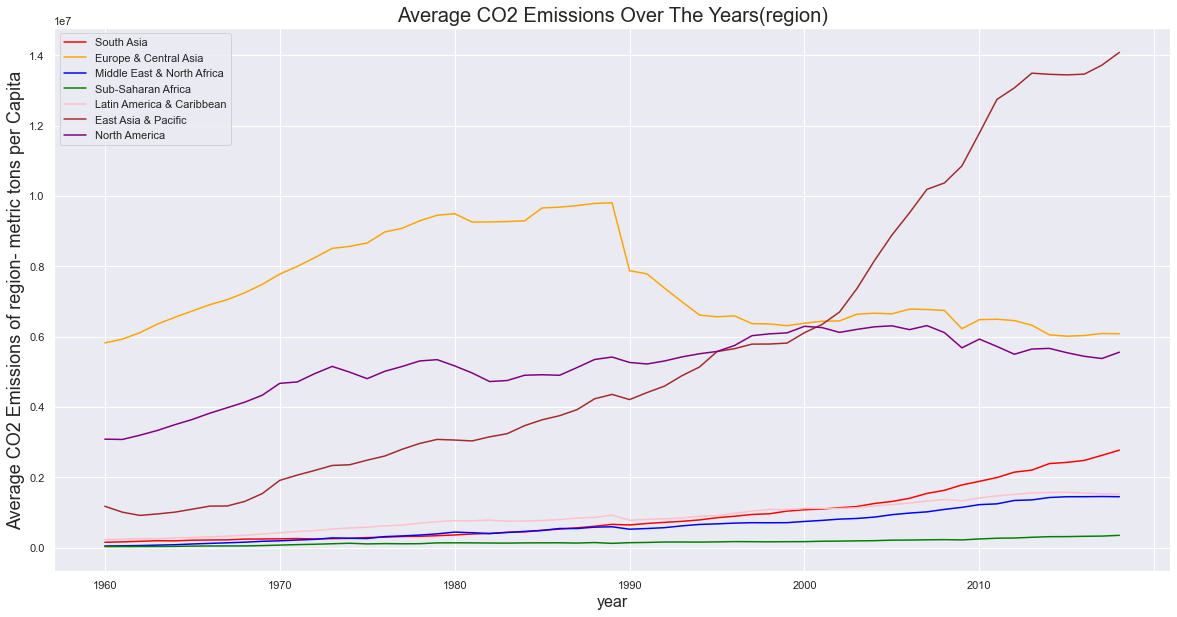

In [59]:
fig, ax = plt.subplots(figsize = (20,10))
#co2_merged_clean.groupby("year")["value"].mean().plot(ax = ax, color = "black", label = "Worldwide")
co2_merged_clean[co2_merged_clean["region"] == "South Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "South Asia")
co2_merged_clean[co2_merged_clean["region"] == "Europe & Central Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Europe & Central Asia")
co2_merged_clean[co2_merged_clean["region"] == "Middle East & North Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Middle East & North Africa")
co2_merged_clean[co2_merged_clean["region"] == "Sub-Saharan Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Sub-Saharan Africa")
co2_merged_clean[co2_merged_clean["region"] == "Latin America & Caribbean"].groupby("year")["value"].sum().plot(ax = ax, color = "pink", label = "Latin America & Caribbean")
co2_merged_clean[co2_merged_clean["region"] == "East Asia & Pacific"].groupby("year")["value"].sum().plot(ax = ax, color = "brown", label = "East Asia & Pacific")
co2_merged_clean[co2_merged_clean["region"] == "North America"].groupby("year")["value"].sum().plot(ax = ax, color = "purple", label = "North America")

plt.xlabel("year", fontsize = 16)
plt.ylabel("Average CO2 Emissions of region- metric tons per Capita", fontsize = 18) #y축이 의미하는 바 고쳐야함
plt.title("Average CO2 Emissions Over The Years(region)", fontsize = 20) #제목 바꿔야함. 
plt.legend(fontsize = 11,loc='upper left')
plt.show()

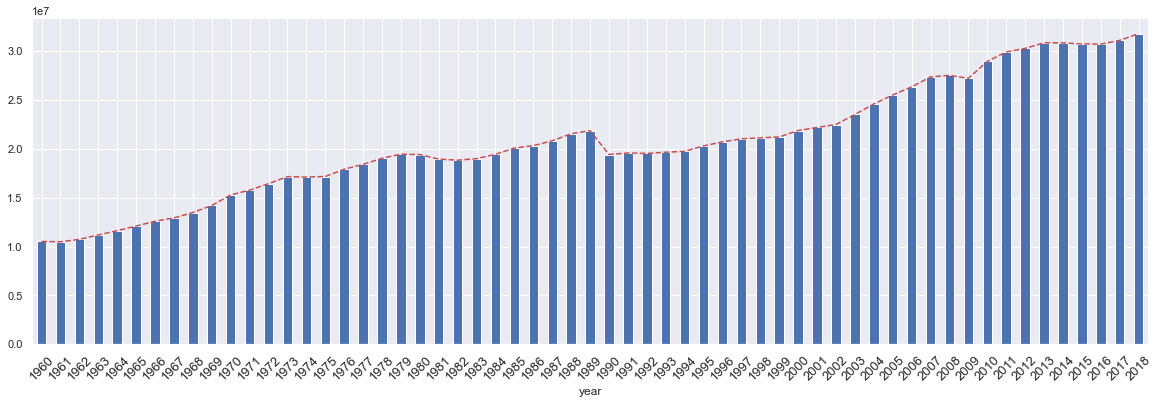

In [60]:
#연도별 co2배출량의 sum으로 고치자. 
plot_co2_year= co2_merged_clean.groupby("year")["value"].sum() 
plt.figure(figsize = (20,6))
plot_co2_year.plot(kind='bar',rot=0)
plot_co2_year.plot(kind='line',color='r',linestyle='--')
plt.xticks(rotation=45,size=13)
plt.show()

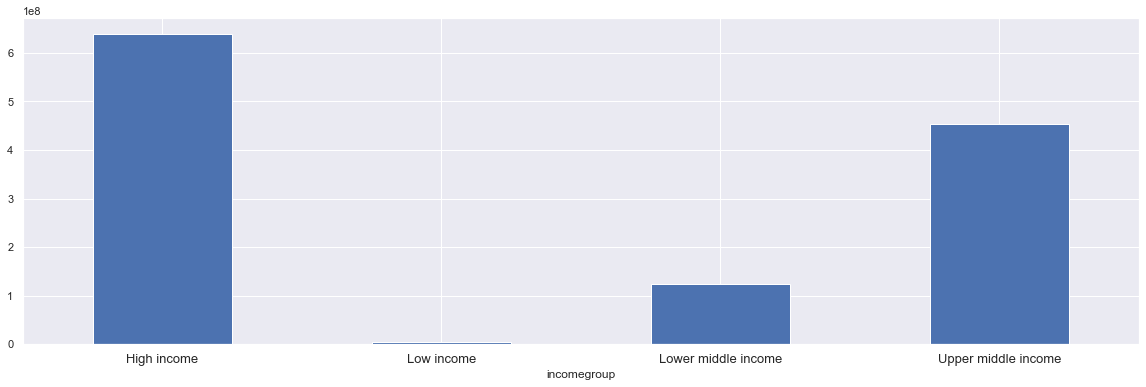

In [61]:
#income group별 co2배출량의 합
plot_co2_income= co2_merged_clean.groupby("incomegroup")["value"].sum()
plt.figure(figsize = (20,6))
plot_co2_income.plot(kind='bar',rot=0)
plt.xticks(size=13)
plt.show()

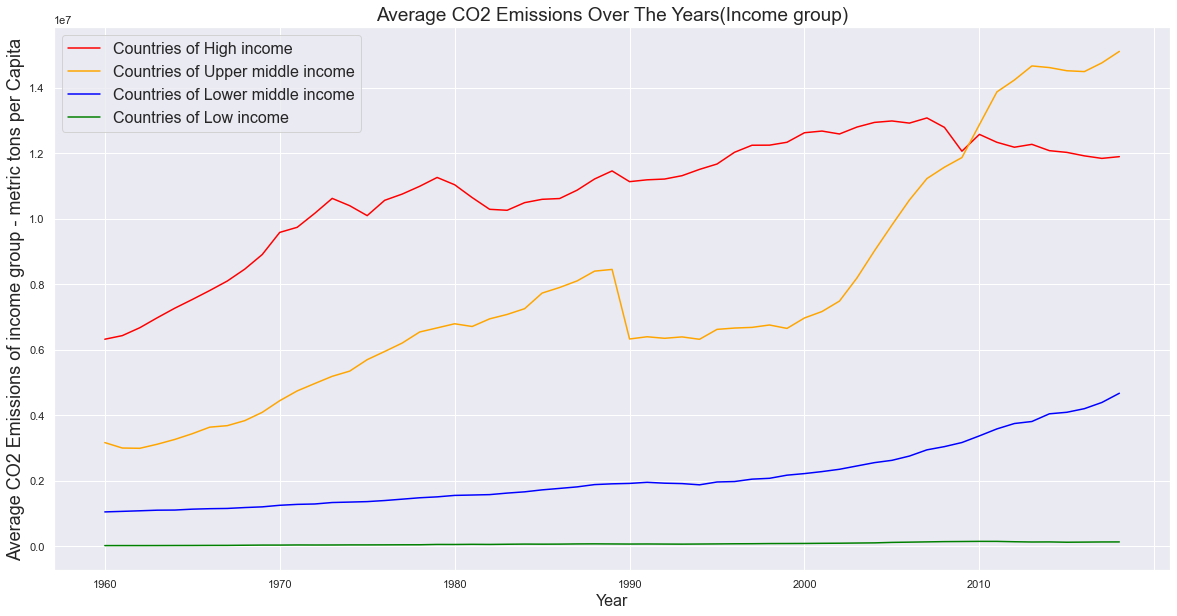

In [62]:
fig, ax = plt.subplots(figsize = (20,10))
#co2_merged_clean.groupby("year")["value"].mean().plot(ax = ax, color = "black", label = "Worldwide")
co2_merged_clean[co2_merged_clean["incomegroup"] == "High income"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "Countries of High income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Upper middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Countries of Upper middle income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Lower middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Countries of Lower middle income")
co2_merged_clean[co2_merged_clean["incomegroup"] == "Low income"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Countries of Low income")
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average CO2 Emissions of income group - metric tons per Capita", fontsize = 18)
plt.title("Average CO2 Emissions Over The Years(Income group)", fontsize = 19) 
plt.legend(fontsize = 16,loc='upper left')
plt.show()

# Fossil Fuel

In [63]:
global_fossil = pd.read_csv('./dataset/global-fossil-fuel-consumption.csv')
country_fossil = pd.read_csv('./dataset/fossil-fuel-primary-energy.csv')

In [64]:
fossil_y = ['Coal (TWh; direct energy)', 'Oil (TWh; direct energy)', 'Gas (TWh; direct energy)']
fig = px.area(global_fossil, x="Year", y=fossil_y, title='Global Fossil Fuel Consumption',
             labels={'value':'measured on terawatt-hours (TWh)'})

fig.show()

In [65]:
global_fossil.head()

,Entity,Code,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
0,World,OWID_WRL,1800,97,0,0
1,World,OWID_WRL,1810,128,0,0
2,World,OWID_WRL,1820,153,0,0
3,World,OWID_WRL,1830,264,0,0
4,World,OWID_WRL,1840,356,0,0


In [66]:
global_fossil.set_index('Year')

,Entity,Code,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
Year,,,,,
1800,World,OWID_WRL,97,0,0
1810,World,OWID_WRL,128,0,0
1820,World,OWID_WRL,153,0,0
1830,World,OWID_WRL,264,0,0
1840,World,OWID_WRL,356,0,0
...,...,...,...,...,...
2015,World,OWID_WRL,43844,50892,34781
2016,World,OWID_WRL,43196,51920,35589
2017,World,OWID_WRL,43360,52568,36586


In [67]:
global_fossil.drop(columns=['Code'],axis=1,inplace=True)
global_fossil.rename(columns={'Entity':'Country Name'},inplace=True)
global_fossil.head(5)

,Country Name,Year,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
0,World,1800,97,0,0
1,World,1810,128,0,0
2,World,1820,153,0,0
3,World,1830,264,0,0
4,World,1840,356,0,0


In [68]:
global_fossil.set_index('Year')
global_fossil.drop(columns=['Country Name'],axis=1,inplace=True)

In [69]:
transpose_global_fossil=global_fossil.T
transpose_global_fossil.head()

,0,1,2,3,4,5,6,7,8,9,...,62,63,64,65,66,67,68,69,70,71
Year,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Coal (TWh; direct energy),97,128,153,264,356,569,1061,1642,2542,3856,...,41997,44018,44185,44993,44954,43844,43196,43360,44109,43849
Oil (TWh; direct energy),0,0,0,0,0,0,0,6,33,89,...,48087,48550,49157,49689,50014,50892,51920,52568,53181,53620
Gas (TWh; direct energy),0,0,0,0,0,0,0,0,0,33,...,31606,32372,33219,33767,33994,34781,35589,36586,38517,39292


In [70]:
year_list=['1800', '1810', '1820', '1830', '1840', '1850', '1860', '1870', '1880', '1890', '1900',
       '1910', '1920', '1930', '1940', '1950', '1960', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000','2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']

In [71]:
transpose_global_fossil.columns=year_list
transpose_global_fossil.head(5)

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Year,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Coal (TWh; direct energy),97,128,153,264,356,569,1061,1642,2542,3856,...,41997,44018,44185,44993,44954,43844,43196,43360,44109,43849
Oil (TWh; direct energy),0,0,0,0,0,0,0,6,33,89,...,48087,48550,49157,49689,50014,50892,51920,52568,53181,53620
Gas (TWh; direct energy),0,0,0,0,0,0,0,0,0,33,...,31606,32372,33219,33767,33994,34781,35589,36586,38517,39292


In [72]:
transpose_global_fossil.drop(index=['Year'],axis=0,inplace=True)
transpose_global_fossil

,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Coal (TWh; direct energy),97,128,153,264,356,569,1061,1642,2542,3856,...,41997,44018,44185,44993,44954,43844,43196,43360,44109,43849
Oil (TWh; direct energy),0,0,0,0,0,0,0,6,33,89,...,48087,48550,49157,49689,50014,50892,51920,52568,53181,53620
Gas (TWh; direct energy),0,0,0,0,0,0,0,0,0,33,...,31606,32372,33219,33767,33994,34781,35589,36586,38517,39292


In [73]:
global_fossil_19652018=transpose_global_fossil.iloc[:,17:-1]
global_fossil_19652018

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Coal (TWh; direct energy),16140,16324,16061,16301,16799,17059,16966,17154,17668,17682,...,40149,41997,44018,44185,44993,44954,43844,43196,43360,44109
Oil (TWh; direct energy),18109,19496,20891,22675,24577,26708,28205,30378,32746,32272,...,46654,48087,48550,49157,49689,50014,50892,51920,52568,53181
Gas (TWh; direct energy),6303,6869,7375,8044,8833,9614,10292,10861,11378,11656,...,29411,31606,32372,33219,33767,33994,34781,35589,36586,38517


In [74]:
co2_raw_data=pd.read_csv('./dataset/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3159085-co2emissions(kt).csv')
co2_raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,11092.6750,11576.7190,12713.4890,12178.1070,11840.7430,10623.2990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (kt),EN.ATM.CO2E.KT,118545.9013,123758.9033,128093.8978,132810.3325,144345.3524,155803.7801,...,535604.3575,559333.8573,580510.925,601860.164,586385.004,592299.594,601323.3947,600351.1333,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.3710,491.3780,689.3960,707.7310,839.7430,1008.4250,...,12260.0000,10450.0000,8510.000,7810.000,7990.000,7390.000,7380.0000,7440.0000,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (kt),EN.ATM.CO2E.KT,8760.4630,9376.5190,9710.2160,11540.0490,13985.9380,19827.4690,...,179070.0000,181740.0000,191990.000,198440.000,193060.000,195120.000,201900.0000,224380.0000,NaN,NaN
4,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.0500,454.7080,1180.7740,1151.4380,1224.7780,1188.1080,...,29460.0000,30250.0000,32820.000,34630.000,35160.000,35410.000,30840.0000,27340.0000,NaN,NaN


In [75]:
co2_world=co2_raw_data[co2_raw_data['Country Code']=='WLD']

In [76]:
co2_world

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,World,WLD,CO2 emissions (kt),EN.ATM.CO2E.KT,9463838.5,9423934.424,9732505.89,10274503.99,10820253.01,11402575.2,...,32004027.85,32444191.55,33053846.52,33085191.98,32943427.78,32940650.08,33351608.09,34041045.97,NaN,NaN


In [77]:
co2_19652018=co2_world.drop(columns=['Country Name','Country Code','Indicator Name','Indicator Code','1960','1961','1962','1963','1964','2019','2020'],axis=1,)

In [78]:
co2_19652018

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
259,11402575.2,11988321.42,12413351.89,13087346.57,13976005.56,15272289.24,15913710.78,16680140.79,17582029.2,17563629.93,...,29253757.51,31031799.04,32004027.85,32444191.55,33053846.52,33085191.98,32943427.78,32940650.08,33351608.09,34041045.97


In [79]:
co2_19652018=co2_19652018.rename(index={259:'CO2'})

In [80]:
co2_19652018

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
CO2,11402575.2,11988321.42,12413351.89,13087346.57,13976005.56,15272289.24,15913710.78,16680140.79,17582029.2,17563629.93,...,29253757.51,31031799.04,32004027.85,32444191.55,33053846.52,33085191.98,32943427.78,32940650.08,33351608.09,34041045.97


In [81]:
global_fossil_19652018

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Coal (TWh; direct energy),16140,16324,16061,16301,16799,17059,16966,17154,17668,17682,...,40149,41997,44018,44185,44993,44954,43844,43196,43360,44109
Oil (TWh; direct energy),18109,19496,20891,22675,24577,26708,28205,30378,32746,32272,...,46654,48087,48550,49157,49689,50014,50892,51920,52568,53181
Gas (TWh; direct energy),6303,6869,7375,8044,8833,9614,10292,10861,11378,11656,...,29411,31606,32372,33219,33767,33994,34781,35589,36586,38517


In [82]:
co2_19652018['1965']

CO2    11402575.2
Name: 1965, dtype: float64

In [83]:
global_fossil_19652018['1965']

Coal (TWh; direct energy)    16140
Oil (TWh; direct energy)     18109
Gas (TWh; direct energy)      6303
Name: 1965, dtype: int64

In [84]:
merged_co2_fossil=pd.concat([co2_19652018,global_fossil_19652018],axis=0)
merged_co2_fossil

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
CO2,11402575.2,11988321.42,12413351.89,13087346.57,13976005.56,15272289.24,15913710.78,16680140.79,17582029.2,17563629.93,...,29253757.51,31031799.04,32004027.85,32444191.55,33053846.52,33085191.98,32943427.78,32940650.08,33351608.09,34041045.97
Coal (TWh; direct energy),16140.0,16324.00,16061.00,16301.00,16799.00,17059.00,16966.00,17154.00,17668.0,17682.00,...,40149.00,41997.00,44018.00,44185.00,44993.00,44954.00,43844.00,43196.00,43360.00,44109.00
Oil (TWh; direct energy),18109.0,19496.00,20891.00,22675.00,24577.00,26708.00,28205.00,30378.00,32746.0,32272.00,...,46654.00,48087.00,48550.00,49157.00,49689.00,50014.00,50892.00,51920.00,52568.00,53181.00
Gas (TWh; direct energy),6303.0,6869.00,7375.00,8044.00,8833.00,9614.00,10292.00,10861.00,11378.0,11656.00,...,29411.00,31606.00,32372.00,33219.00,33767.00,33994.00,34781.00,35589.00,36586.00,38517.00


In [85]:
transpose_merged_co2_fossil=merged_co2_fossil.transpose()
transpose_merged_co2_fossil

,CO2,Coal (TWh; direct energy),Oil (TWh; direct energy),Gas (TWh; direct energy)
1965,11402575.20,16140.0,18109.0,6303.0
1966,11988321.42,16324.0,19496.0,6869.0
1967,12413351.89,16061.0,20891.0,7375.0
1968,13087346.57,16301.0,22675.0,8044.0
1969,13976005.56,16799.0,24577.0,8833.0
1970,15272289.24,17059.0,26708.0,9614.0
1971,15913710.78,16966.0,28205.0,10292.0
1972,16680140.79,17154.0,30378.0,10861.0
1973,17582029.20,17668.0,32746.0,11378.0
1974,17563629.93,17682.0,32272.0,11656.0


In [86]:
series_co2=transpose_merged_co2_fossil['CO2'].astype(int)
series_coal=transpose_merged_co2_fossil['Coal (TWh; direct energy)'].astype(int)
series_oil=transpose_merged_co2_fossil['Oil (TWh; direct energy)'].astype(int)
series_gas=transpose_merged_co2_fossil['Gas (TWh; direct energy)'].astype(int)
final_co2_fossil=pd.concat([series_co2,series_coal,series_oil,series_gas],axis=1)

In [87]:
#final_co2_fossil

In [88]:
final_co2_fossil.rename(columns={'Coal (TWh; direct energy)':'coal','Oil (TWh; direct energy)':'oil','Gas (TWh; direct energy)':'gas'},inplace=True)
final_co2_fossil

,CO2,coal,oil,gas
1965,11402575,16140,18109,6303
1966,11988321,16324,19496,6869
1967,12413351,16061,20891,7375
1968,13087346,16301,22675,8044
1969,13976005,16799,24577,8833
1970,15272289,17059,26708,9614
1971,15913710,16966,28205,10292
1972,16680140,17154,30378,10861
1973,17582029,17668,32746,11378
1974,17563629,17682,32272,11656


In [89]:
final_co2_fossil.describe()

,CO2,coal,oil,gas
count,5.400000e+01,54.00000,54.000000,54.000000
mean,2.280026e+07,27738.62963,38623.574074,20513.962963
std,6.076147e+06,9589.29103,8745.328044,8829.757111
min,1.140258e+07,16061.00000,18109.000000,6303.000000
25%,1.983174e+07,19684.50000,33751.500000,13500.250000
50%,2.165604e+07,25834.50000,37895.000000,20021.000000
75%,2.707382e+07,35544.25000,46554.500000,27282.000000
max,3.404104e+07,44993.00000,53181.000000,38517.000000


In [90]:
corr=final_co2_fossil[['CO2','coal','oil','gas']].corr(method='pearson')
corr

,CO2,coal,oil,gas
CO2,1.000000,0.973382,0.962514,0.974622
coal,0.973382,1.000000,0.915496,0.975141
oil,0.962514,0.915496,1.000000,0.965268
gas,0.974622,0.975141,0.965268,1.000000


In [91]:
country_fossil = country_fossil.dropna()

top = country_fossil[country_fossil.Year==2019].sort_values(by='Fossil Fuels (TWh)').tail(11).Entity[:10]

fossil_top10 = []
for country in top:
    fossil_top10.append(country)
    
top10_fossil = country_fossil[country_fossil['Entity'].isin(fossil_top10)]
top10_fossil = top10_fossil.pivot('Year','Entity', 'Fossil Fuels (TWh)').dropna(axis=0)

Text(0.5, 1.0, 'Which Countries use the most Energy from Fossil Fuels')

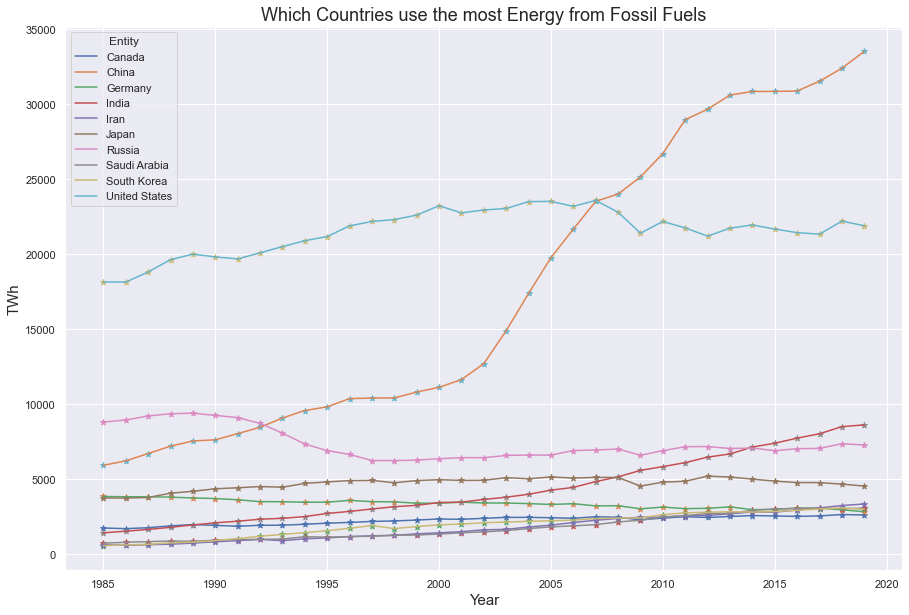

In [92]:
top10_fossil.plot(figsize=(15,10))
for country in fossil_top10:
    plt.scatter(x=top10_fossil.index, y=top10_fossil[country], marker='*')

plt.xlabel('Year', fontsize=15)
plt.ylabel('TWh', fontsize=15)
plt.title('Which Countries use the most Energy from Fossil Fuels', fontsize=18)

In [93]:
from matplotlib import cm

In [94]:
# load data

fossil = wb.data.DataFrame('EG.USE.COMM.FO.ZS').iloc[:,-10:]
renewable = wb.data.DataFrame('EG.FEC.RNEW.ZS').iloc[:,-10:]

metadata_capita = pd.read_csv('./dataset/Metadata_Country_API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3052552.csv')

In [95]:
metadata_capita = metadata_capita.iloc[:,:2].rename(columns={'Country Code':'economy'})

In [96]:
fossil = fossil.reset_index()
renewable = renewable.reset_index()

In [97]:
fossil = pd.merge(fossil, metadata_capita, on='economy')
renewable = pd.merge(renewable, metadata_capita, on='economy')

In [98]:
df = wb.economy.DataFrame()
country_name = {}

for ticker in df.index:
    country_name[ticker] = df.loc[ticker][0]

In [99]:
country = pd.DataFrame([country_name.keys(), country_name.values()]).T
country = country.rename({0:'economy', 1:'country'}, axis=1)

fossil = pd.merge(fossil, country, on='economy')
renewable = pd.merge(renewable, country, on='economy')

In [100]:
fossil = fossil.set_index('country')
renewable = renewable.set_index('country')

In [101]:
fossil = fossil.dropna(axis=1, how='all')
renewable = renewable.dropna(axis=1, how='all')

In [102]:
fossil_drop = fossil[fossil['Region'].isna()].index
renewable_drop = renewable[renewable['Region'].isna()].index

fossil = fossil.drop(fossil_drop, axis=0)
renewable = renewable.drop(renewable_drop, axis=0)

# fossil fuel energy consumption

In [103]:
fossil.head(10)

,economy,YR2011,YR2012,YR2013,YR2014,YR2015,Region
country,,,,,,,
Aruba,ABW,NaN,NaN,NaN,NaN,NaN,Latin America & Caribbean
Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,South Asia
Angola,AGO,43.849784,48.010060,46.508554,48.305593,NaN,Sub-Saharan Africa
Albania,ALB,61.502765,57.754082,56.395339,61.421801,NaN,Europe & Central Asia
Andorra,AND,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
United Arab Emirates,ARE,91.675585,90.104537,93.614883,86.128349,NaN,Middle East & North Africa
Argentina,ARG,88.853811,89.024907,88.966064,87.722407,NaN,Latin America & Caribbean
Armenia,ARM,71.549930,77.332943,75.492844,74.561866,NaN,Europe & Central Asia
American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,East Asia & Pacific


In [104]:
fossil[fossil['Region']=='Europe & Central Asia']

,economy,YR2011,YR2012,YR2013,YR2014,YR2015,Region
country,,,,,,,
Albania,ALB,61.502765,57.754082,56.395339,61.421801,NaN,Europe & Central Asia
Andorra,AND,NaN,NaN,NaN,NaN,NaN,Europe & Central Asia
Armenia,ARM,71.549930,77.332943,75.492844,74.561866,NaN,Europe & Central Asia
Austria,AUT,69.154183,67.302507,66.253804,64.813156,65.661822,Europe & Central Asia
Azerbaijan,AZE,97.862572,98.476702,98.211233,98.365990,NaN,Europe & Central Asia
Belgium,BEL,70.254496,71.115714,70.820306,72.652505,75.870784,Europe & Central Asia
Bulgaria,BGR,75.043951,72.187100,70.208479,71.045923,NaN,Europe & Central Asia
Bosnia and Herzegovina,BIH,93.996643,91.947803,92.504002,77.522045,NaN,Europe & Central Asia
Belarus,BLR,91.392471,91.047270,90.672040,92.440375,NaN,Europe & Central Asia


In [105]:
# 데이터의 연도별 차이가 크지 않음. 따라서 국가별 결측치가 가장 덜 한 YR2013을 기준으로 분석함
# mean(): 결측국가 평균에서 제외
continent_fossil = fossil.groupby('Region')['YR2013'].mean()
continent_fossil

Region
East Asia & Pacific           76.182873
Europe & Central Asia         72.777717
Latin America & Caribbean     67.737371
Middle East & North Africa    96.925299
North America                 78.057013
South Asia                    52.795889
Sub-Saharan Africa            36.018263
Name: YR2013, dtype: float64

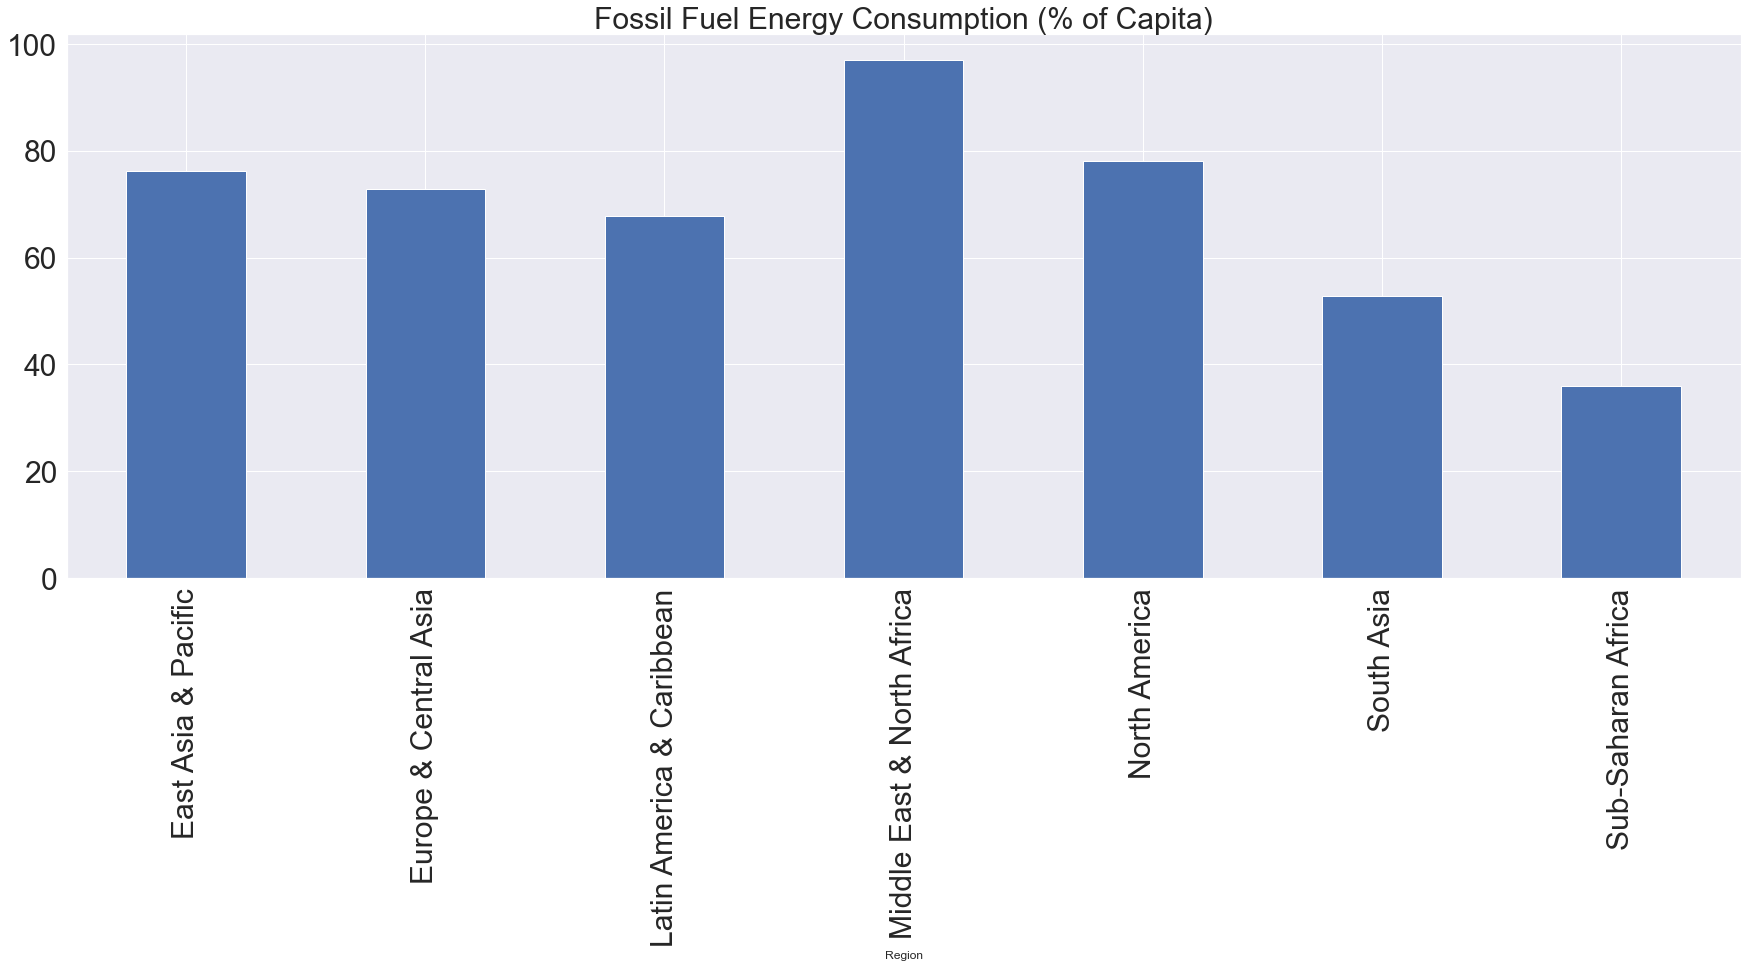

In [106]:
continent_fossil.plot.bar(figsize=(30,10), legend = None,  fontsize = 30)
plt.title("Fossil Fuel Energy Consumption (% of Capita)", fontsize = 30)

plt.show()

In [107]:
fossil.loc[:,'YR2015'].dropna().sort_values()

country
Iceland            11.288869
Estonia            13.056215
Sweden             25.117096
Finland            40.207983
France             46.487971
Switzerland        50.168225
Norway             56.951629
New Zealand        59.749169
Slovenia           61.114199
Slovak Republic    64.091495
Denmark            64.927089
Austria            65.661822
Hungary            69.549794
Spain              72.955546
Canada             74.089062
Chile              74.647212
Belgium            75.870784
Portugal           77.024123
Czech Republic     77.734587
Germany            78.862551
Italy              79.948455
United Kingdom     80.351771
Luxembourg         80.562295
Korea, Rep.        81.028476
United States      82.427828
Greece             82.574635
Ireland            85.342820
Turkey             86.843188
Australia          89.625630
Poland             90.291375
Mexico             90.426208
Japan              93.026455
Netherlands        93.461005
Israel             97.382124
Name: 

# ch4

In [108]:
ch4_meta_data=pd.read_csv('./dataset/Metadata_Country_API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3161021-methane emissions.csv')
ch4_meta_data.head(5)

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,Fiscal year end: March 20; reporting period fo...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN


In [109]:
ch4_meta_data.shape

(265, 6)

In [110]:
ch4_value_data=pd.read_csv('./dataset/API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3161021-methane emissions.csv')
ch4_value_data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,523850.0,534240.0,538060.0,543720.0,554570.0,563050.0,564380.0,570040.0,NaN,NaN
2,Afghanistan,AFG,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0,NaN,NaN
3,Africa Western and Central,AFW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,327790.0,336470.0,348150.0,356630.0,368640.0,383250.0,386400.0,392130.0,NaN,NaN
4,Angola,AGO,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0,NaN,NaN


In [111]:
ch4_meta_data.drop(columns=['SpecialNotes','TableName','Unnamed: 5'],axis=1,inplace=True)

In [112]:
ch4_value_data.drop(columns=['Indicator Name','Indicator Code'],axis=1,inplace=True)

In [113]:
print(ch4_meta_data.shape)
print(ch4_value_data.shape)

(265, 3)
(266, 63)


In [114]:
ch4_meta_data.columns = change_col(ch4_meta_data.columns)
ch4_value_data.columns = change_col(ch4_value_data.columns)

In [115]:
ch4_value_data.iloc[:,2:] = ch4_value_data.iloc[:,2:].fillna(method='bfill',axis=1)
f_ch4_value_data=ch4_value_data
#final_co2_value_data=f_co2_value_data.fillna(method='bfill',axis=0,inplace=True)

In [116]:
f_ch4_value_data.head(5)

,country_name,country_code,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,10.2469,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,384746.7182,...,523850.0,534240.0,538060.0,543720.0,554570.0,563050.0,564380.0,570040.0,NaN,NaN
2,Afghanistan,AFG,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,10202.0000,...,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0,NaN,NaN
3,Africa Western and Central,AFW,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,143714.5355,...,327790.0,336470.0,348150.0,356630.0,368640.0,383250.0,386400.0,392130.0,NaN,NaN
4,Angola,AGO,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,23376.6000,...,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0,NaN,NaN


In [117]:
f_ch4_value_data.iloc[:,2:] = f_ch4_value_data.iloc[:,2:].fillna(method='ffill',axis=1)
final_ch4_value_data=f_ch4_value_data

In [118]:
final_ch4_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 63 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1960          256 non-null    float64
 3   1961          256 non-null    float64
 4   1962          256 non-null    float64
 5   1963          256 non-null    float64
 6   1964          256 non-null    float64
 7   1965          256 non-null    float64
 8   1966          256 non-null    float64
 9   1967          256 non-null    float64
 10  1968          256 non-null    float64
 11  1969          256 non-null    float64
 12  1970          256 non-null    float64
 13  1971          256 non-null    float64
 14  1972          256 non-null    float64
 15  1973          256 non-null    float64
 16  1974          256 non-null    float64
 17  1975          256 non-null    float64
 18  1976          256 non-null    

In [119]:
final_ch4_value_data.drop(['1960','1961','1962','1963','1964','1965',
                           '1966','1967','1968','1969','2019','2020'],axis=1,inplace=True)

In [120]:
final_ch4_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1970          256 non-null    float64
 3   1971          256 non-null    float64
 4   1972          256 non-null    float64
 5   1973          256 non-null    float64
 6   1974          256 non-null    float64
 7   1975          256 non-null    float64
 8   1976          256 non-null    float64
 9   1977          256 non-null    float64
 10  1978          256 non-null    float64
 11  1979          256 non-null    float64
 12  1980          256 non-null    float64
 13  1981          256 non-null    float64
 14  1982          256 non-null    float64
 15  1983          256 non-null    float64
 16  1984          256 non-null    float64
 17  1985          256 non-null    float64
 18  1986          256 non-null    

In [121]:
final_ch4_value_data[~final_ch4_value_data.country_code.isin(ch4_meta_data.country_code)]

,country_name,country_code,1970,1971,1972,1973,1974,1975,1976,1977,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
110,Not classified,INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
index_drop_ch4=final_ch4_value_data[~final_ch4_value_data.country_code.isin(ch4_meta_data.country_code)].index
print(index_drop_ch4)

Int64Index([110], dtype='int64')


In [123]:
final_ch4_value_data.drop(index_drop_co2,inplace=True)

In [124]:
ch4_mergedData = pd.merge(ch4_meta_data, final_ch4_value_data, on=["country_code"], how="inner")
ch4_mergedData

,country_code,region,incomegroup,country_name,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,10.2469,10.4531,10.6570,10.8551,11.0415,11.2194,...,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981
1,AFE,NaN,NaN,Africa Eastern and Southern,384746.7182,265076.7091,278192.0872,296153.8053,269903.4576,303388.4675,...,496350.0000,515480.0000,523850.0000,534240.0000,538060.0000,543720.0000,554570.0000,563050.0000,564380.0000,570040.0000
2,AFG,South Asia,Low income,Afghanistan,10202.0000,10201.5000,9170.5900,9403.5400,9987.9300,10476.6000,...,25430.0000,30010.0000,39480.0000,48780.0000,58130.0000,67770.0000,76590.0000,78150.0000,79610.0000,81510.0000
3,AFW,NaN,NaN,Africa Western and Central,143714.5355,145309.3393,149181.1477,161770.8276,146860.2617,145799.6598,...,305760.0000,315610.0000,327790.0000,336470.0000,348150.0000,356630.0000,368640.0000,383250.0000,386400.0000,392130.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,23376.6000,14500.0000,15590.0000,16651.7000,15008.3000,17061.4000,...,35590.0000,37730.0000,38100.0000,37110.0000,37420.0000,36700.0000,37180.0000,37400.0000,37450.0000,35520.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,XKX,Europe & Central Asia,Upper middle income,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,YEM,Middle East & North Africa,Low income,"Yemen, Rep.",2204.6700,2350.9700,2338.2200,2275.6300,2397.2700,2456.2800,...,7870.0000,8020.0000,8120.0000,8150.0000,8210.0000,8270.0000,8200.0000,8150.0000,8210.0000,8590.0000
262,ZAF,Sub-Saharan Africa,Upper middle income,South Africa,32269.9000,31853.4000,32150.2000,33393.0000,34374.5000,35700.4000,...,42490.0000,43360.0000,43580.0000,44220.0000,44260.0000,44600.0000,44560.0000,44460.0000,44990.0000,45140.0000
263,ZMB,Sub-Saharan Africa,Lower middle income,Zambia,33880.5000,14742.8000,16642.0000,18544.1000,14937.9000,19599.6000,...,14290.0000,15340.0000,15050.0000,16900.0000,17420.0000,17530.0000,18010.0000,17850.0000,17450.0000,17870.0000


In [125]:
ch4_mergedData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 0 to 264
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  265 non-null    object 
 1   region        217 non-null    object 
 2   incomegroup   216 non-null    object 
 3   country_name  265 non-null    object 
 4   1970          256 non-null    float64
 5   1971          256 non-null    float64
 6   1972          256 non-null    float64
 7   1973          256 non-null    float64
 8   1974          256 non-null    float64
 9   1975          256 non-null    float64
 10  1976          256 non-null    float64
 11  1977          256 non-null    float64
 12  1978          256 non-null    float64
 13  1979          256 non-null    float64
 14  1980          256 non-null    float64
 15  1981          256 non-null    float64
 16  1982          256 non-null    float64
 17  1983          256 non-null    float64
 18  1984          256 non-null    

In [126]:
ch4_mergedData.head()

,country_code,region,incomegroup,country_name,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,ABW,Latin America & Caribbean,High income,Aruba,10.2469,10.4531,10.6570,10.8551,11.0415,11.2194,...,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981
1,AFE,NaN,NaN,Africa Eastern and Southern,384746.7182,265076.7091,278192.0872,296153.8053,269903.4576,303388.4675,...,496350.0000,515480.0000,523850.0000,534240.0000,538060.0000,543720.0000,554570.0000,563050.0000,564380.0000,570040.0000
2,AFG,South Asia,Low income,Afghanistan,10202.0000,10201.5000,9170.5900,9403.5400,9987.9300,10476.6000,...,25430.0000,30010.0000,39480.0000,48780.0000,58130.0000,67770.0000,76590.0000,78150.0000,79610.0000,81510.0000
3,AFW,NaN,NaN,Africa Western and Central,143714.5355,145309.3393,149181.1477,161770.8276,146860.2617,145799.6598,...,305760.0000,315610.0000,327790.0000,336470.0000,348150.0000,356630.0000,368640.0000,383250.0000,386400.0000,392130.0000
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,23376.6000,14500.0000,15590.0000,16651.7000,15008.3000,17061.4000,...,35590.0000,37730.0000,38100.0000,37110.0000,37420.0000,36700.0000,37180.0000,37400.0000,37450.0000,35520.0000


In [127]:
ch4_mergedData.columns

Index(['country_code', 'region', 'incomegroup', 'country_name', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [128]:
year_data_ch4=ch4_mergedData.iloc[:,4:]
year_data_ch4

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,10.2469,10.4531,10.6570,10.8551,11.0415,11.2194,11.5069,11.6718,12.2338,12.4857,...,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981,14.8981
1,384746.7182,265076.7091,278192.0872,296153.8053,269903.4576,303388.4675,286699.8136,319345.1963,327883.6744,396278.3059,...,496350.0000,515480.0000,523850.0000,534240.0000,538060.0000,543720.0000,554570.0000,563050.0000,564380.0000,570040.0000
2,10202.0000,10201.5000,9170.5900,9403.5400,9987.9300,10476.6000,10535.6000,10455.9000,10380.1000,10176.2000,...,25430.0000,30010.0000,39480.0000,48780.0000,58130.0000,67770.0000,76590.0000,78150.0000,79610.0000,81510.0000
3,143714.5355,145309.3393,149181.1477,161770.8276,146860.2617,145799.6598,154139.5180,166472.3378,152491.7936,176884.3183,...,305760.0000,315610.0000,327790.0000,336470.0000,348150.0000,356630.0000,368640.0000,383250.0000,386400.0000,392130.0000
4,23376.6000,14500.0000,15590.0000,16651.7000,15008.3000,17061.4000,15036.7000,17437.0000,18279.2000,22903.7000,...,35590.0000,37730.0000,38100.0000,37110.0000,37420.0000,36700.0000,37180.0000,37400.0000,37450.0000,35520.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,2204.6700,2350.9700,2338.2200,2275.6300,2397.2700,2456.2800,2353.0100,2379.9500,2404.6000,2427.4400,...,7870.0000,8020.0000,8120.0000,8150.0000,8210.0000,8270.0000,8200.0000,8150.0000,8210.0000,8590.0000
262,32269.9000,31853.4000,32150.2000,33393.0000,34374.5000,35700.4000,36502.3000,37856.4000,38728.0000,41239.3000,...,42490.0000,43360.0000,43580.0000,44220.0000,44260.0000,44600.0000,44560.0000,44460.0000,44990.0000,45140.0000
263,33880.5000,14742.8000,16642.0000,18544.1000,14937.9000,19599.6000,16628.4000,20391.4000,21838.0000,31530.3000,...,14290.0000,15340.0000,15050.0000,16900.0000,17420.0000,17530.0000,18010.0000,17850.0000,17450.0000,17870.0000


In [129]:
cols2=['1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982',
     '1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995',
     '1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
     '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']

In [130]:
zero_list2=[]
for col2 in cols2:
    idx2=year_data_ch4[year_data_ch4[col2]<0].index
    
    if (len(idx2))>0:
        zero_list2.append(idx2)

In [131]:
print(zero_list2) #뺼 idx 없음.

[]


In [132]:
ch4_mergedData=ch4_mergedData[ch4_mergedData['country_name'].isin(country_list)]
ch4_mergedData.shape

(152, 53)

In [133]:
ch4_mergedData.head()

,country_code,region,incomegroup,country_name,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,AFG,South Asia,Low income,Afghanistan,10202.00,10201.50,9170.59,9403.54,9987.93,10476.60,...,25430.0,30010.0,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0
4,AGO,Sub-Saharan Africa,Lower middle income,Angola,23376.60,14500.00,15590.00,16651.70,15008.30,17061.40,...,35590.0,37730.0,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0
5,ALB,Europe & Central Asia,Upper middle income,Albania,1763.64,1717.47,1737.08,1794.07,1815.36,1864.83,...,3110.0,3120.0,3120.0,3170.0,3190.0,3230.0,3250.0,3250.0,3210.0,3160.0
9,ARG,Latin America & Caribbean,Upper middle income,Argentina,84917.80,84729.10,88496.00,90791.30,91811.90,93881.00,...,117630.0,109830.0,109130.0,111740.0,113350.0,114180.0,114090.0,115580.0,117570.0,117850.0
10,ARM,Europe & Central Asia,Upper middle income,Armenia,1317.98,1384.62,1440.48,1485.25,1541.25,1587.12,...,2310.0,2370.0,2370.0,2420.0,2500.0,2540.0,2560.0,2570.0,2510.0,2430.0


In [134]:
#-----------

In [135]:
#----------

In [136]:
ch4_merged_clean= pd.melt(ch4_mergedData,id_vars = ["country_name","country_code","region","incomegroup"], 
var_name = "year")

In [137]:
ch4_merged_clean

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1970,10202.00
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1970,23376.60
2,Albania,ALB,Europe & Central Asia,Upper middle income,1970,1763.64
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1970,84917.80
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1970,1317.98
...,...,...,...,...,...,...
7443,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,105930.00
7444,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,87750.00
7445,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,8590.00
7446,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,17870.00


In [138]:
#2018년
data = [ dict(type = 'choropleth',
        autocolorscale = False,
        #colorscale = metricscale1,
        color='continent',
        showscale = True,
        locations = ch4_mergedData['country_name'].values,
        z = ch4_mergedData['2018'].values,
        locationmode = 'country names',
        text = ch4_mergedData['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'CH4 emission')
            )
       ]

layout = dict(
    title = 'World Map of CH4 emission in the Year 2018',
    geo = dict(showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        #type = 'orthographic',
        type='natural earth',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2018')

#metricscale2=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
#              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
#              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
#              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]

#1970년
data = [ dict(type = 'choropleth',
        autocolorscale = False,
        #colorscale = metricscale2,
        color='continent',
        showscale = True,
        locations = ch4_mergedData['country_name'].values,
        z = ch4_mergedData['1970'].values,
        locationmode = 'country names',
        text = ch4_mergedData['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'CH4 emission')
            )
       ]

layout = dict(
    title = 'World Map of CH4 emission in the Year 1970',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        #type = 'orthographic',
        type='natural earth',
        rotation = dict(
            lon = 60,
            lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(202, 202, 202)',
                width = '0.05'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap1970')

In [139]:
ch4_1970=ch4_merged_clean[ch4_merged_clean['year']=='1970']
ch4_1970

,country_name,country_code,region,incomegroup,year,value
0,Afghanistan,AFG,South Asia,Low income,1970,10202.00
1,Angola,AGO,Sub-Saharan Africa,Lower middle income,1970,23376.60
2,Albania,ALB,Europe & Central Asia,Upper middle income,1970,1763.64
3,Argentina,ARG,Latin America & Caribbean,Upper middle income,1970,84917.80
4,Armenia,ARM,Europe & Central Asia,Upper middle income,1970,1317.98
...,...,...,...,...,...,...
147,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,1970,16830.80
148,Vietnam,VNM,East Asia & Pacific,Lower middle income,1970,54144.90
149,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,1970,2204.67
150,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,1970,33880.50


In [140]:
ch4_2018=ch4_merged_clean[ch4_merged_clean['year']=='2018']
ch4_2018

,country_name,country_code,region,incomegroup,year,value
7296,Afghanistan,AFG,South Asia,Low income,2018,81510.0
7297,Angola,AGO,Sub-Saharan Africa,Lower middle income,2018,35520.0
7298,Albania,ALB,Europe & Central Asia,Upper middle income,2018,3160.0
7299,Argentina,ARG,Latin America & Caribbean,Upper middle income,2018,117850.0
7300,Armenia,ARM,Europe & Central Asia,Upper middle income,2018,2430.0
...,...,...,...,...,...,...
7443,Uzbekistan,UZB,Europe & Central Asia,Lower middle income,2018,105930.0
7444,Vietnam,VNM,East Asia & Pacific,Lower middle income,2018,87750.0
7445,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,2018,8590.0
7446,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,2018,17870.0


In [141]:
ch4_1970_region=ch4_1970.groupby('region')['value'].sum()
ch4_2018_region=ch4_2018.groupby('region')['value'].sum()

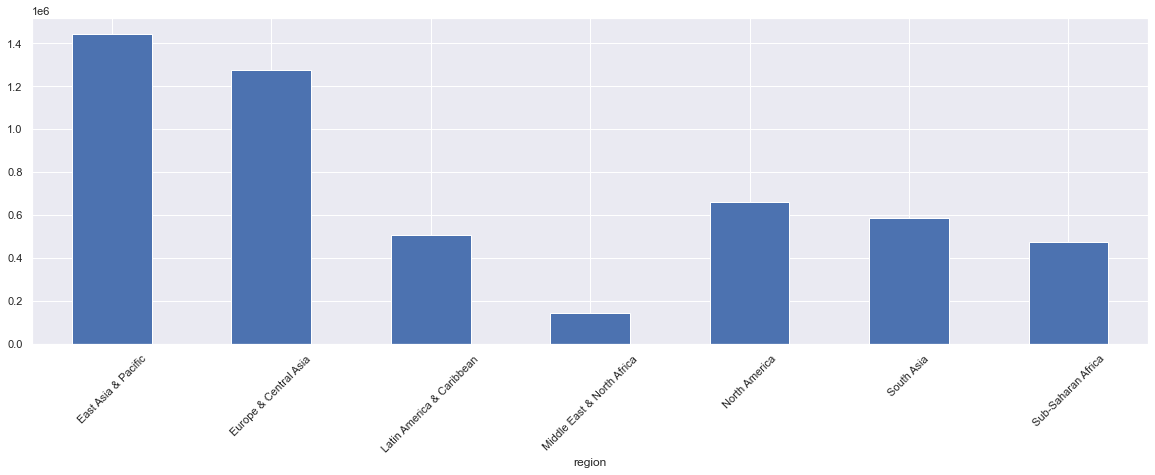

CH4 emissions(region)-1970

region
East Asia & Pacific           1.445721e+06
Europe & Central Asia         1.277195e+06
Latin America & Caribbean     5.062279e+05
Middle East & North Africa    1.439763e+05
North America                 6.615505e+05
South Asia                    5.856358e+05
Sub-Saharan Africa            4.778540e+05
Name: value, dtype: float64


In [142]:
#1970년
plt.figure(figsize = (20,6))
ch4_1970_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45)
plt.show()
print("CH4 emissions(region)-1970\n")
print(ch4_1970.groupby('region')['value'].sum())

region
East Asia & Pacific           28.357699
Europe & Central Asia         25.052074
Latin America & Caribbean      9.929620
Middle East & North Africa     2.824083
North America                 12.976259
South Asia                    11.487199
Sub-Saharan Africa             9.373066
Name: value, dtype: float64
100.00000000000001


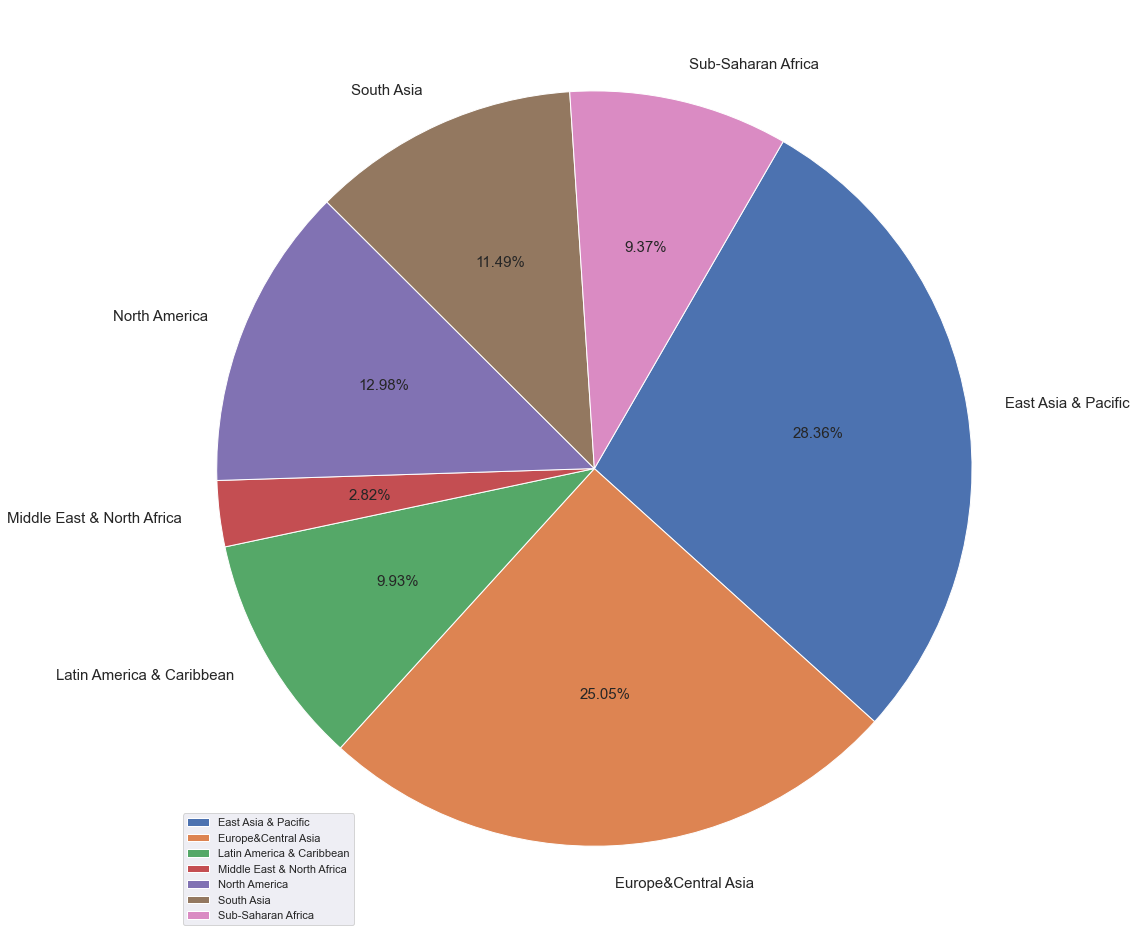

In [143]:
#1970년
total_sum=ch4_1970.groupby('region')['value'].sum().sum()
region_sum=ch4_1970.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) #100이라고 출력됨.
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
#plt.pie(ratio,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',textprops={'size':40})
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)
 
#plt.figure(figsize=(10,10))
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

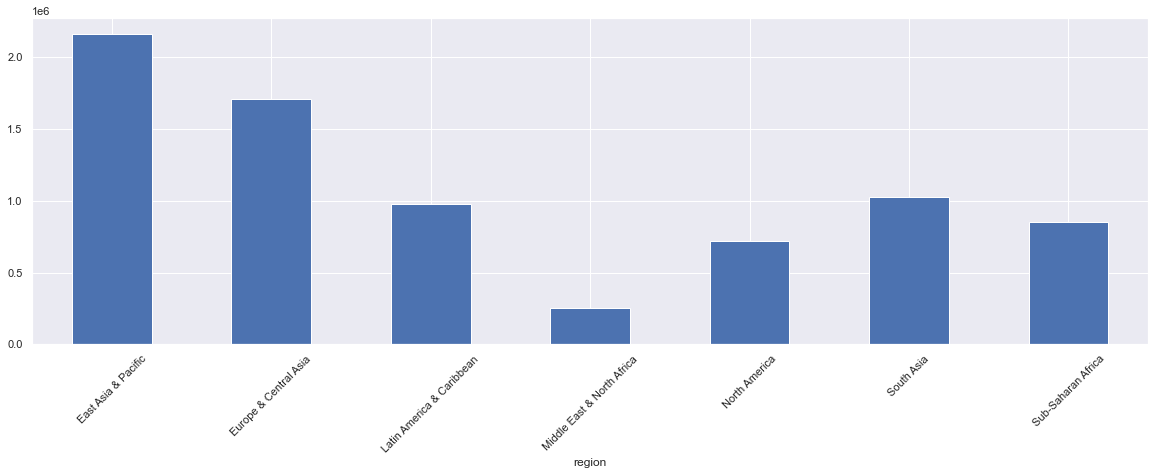

CH4 emissions(region)-2018

region
East Asia & Pacific           2165110.00
Europe & Central Asia         1706940.00
Latin America & Caribbean      974537.56
Middle East & North Africa     250050.00
North America                  716570.00
South Asia                    1024650.00
Sub-Saharan Africa             851980.00
Name: value, dtype: float64


In [144]:
#2018년
plt.figure(figsize = (20,6))
ch4_2018_region.plot(kind='bar',rot=0)
plt.xticks(rotation=45)
plt.show()
print("CH4 emissions(region)-2018\n")
print(ch4_2018.groupby('region')['value'].sum())

region
East Asia & Pacific           28.155471
Europe & Central Asia         22.197348
Latin America & Caribbean     12.673058
Middle East & North Africa     3.251694
North America                  9.318402
South Asia                    13.324729
Sub-Saharan Africa            11.079298
Name: value, dtype: float64
100.0


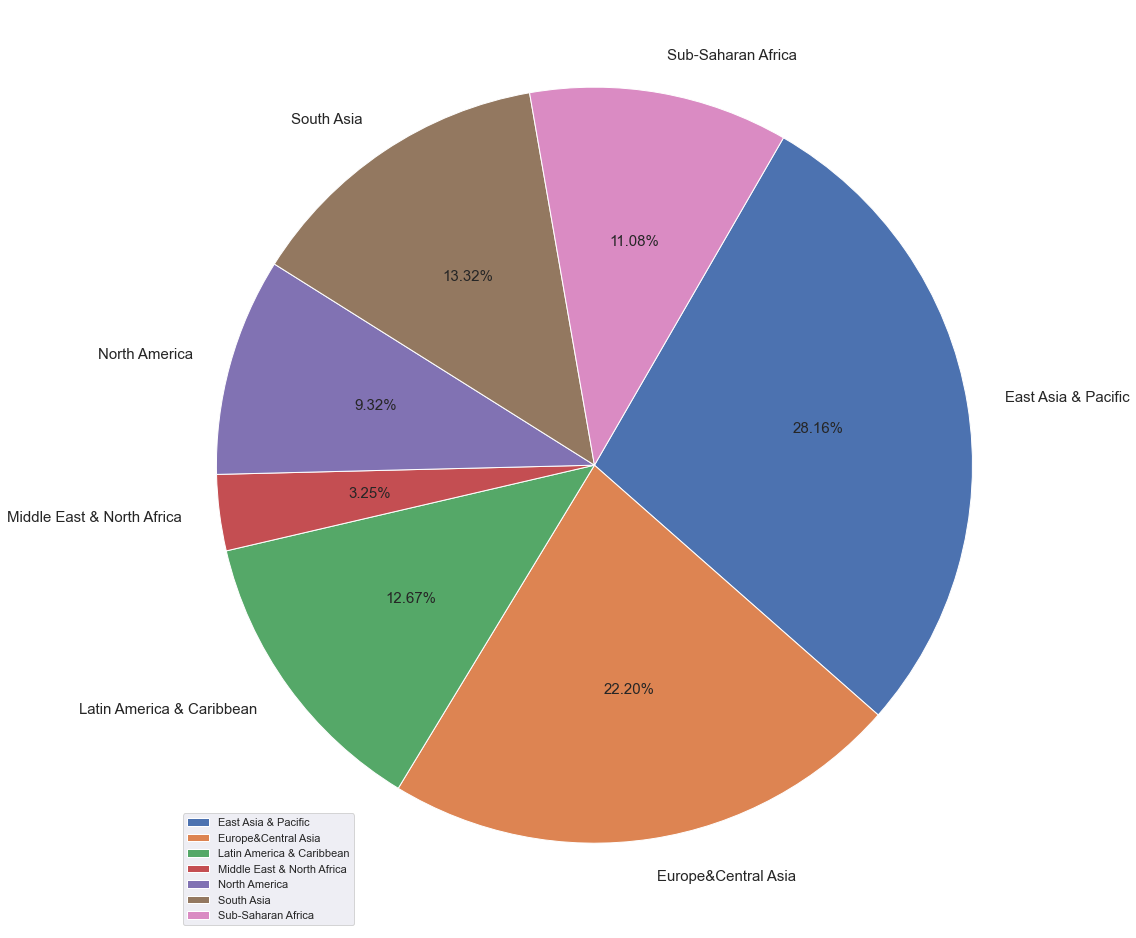

In [145]:
#2018년
total_sum=ch4_2018.groupby('region')['value'].sum().sum()
region_sum=ch4_2018.groupby("region")["value"].sum()

region_sum/total_sum
ratio=100*(region_sum/total_sum)
print(ratio) 
print(ratio.sum()) 
labels=['East Asia & Pacific','Europe&Central Asia','Latin America & Caribbean','Middle East & North Africa','North America',
       'South Asia','Sub-Saharan Africa']

plt.figure(figsize=(15,17))
#plt.pie(ratio,labels=labels,shadow=True,startangle=90,autopct='%1.1f%%',textprops={'size':40})
plt.pie(ratio,labels=labels,startangle=60,autopct='%.2f%%',textprops={'size':15},counterclock=False)
 
#plt.figure(figsize=(10,10))
plt.legend(loc='lower left')
plt.axis('equal')
plt.show()

In [146]:
#2018년 상위 5개 국가를 표현
ch4_merged_clean2018=ch4_merged_clean[ch4_merged_clean.year=='2018'].sort_values('value',ascending=False)
ch4_merged_clean2018

,country_name,country_code,region,incomegroup,year,value
7324,China,CHN,East Asia & Pacific,Upper middle income,2018,1238630.0
7415,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,849570.0
7358,India,IND,South Asia,Lower middle income,2018,666510.0
7442,United States,USA,North America,High income,2018,622590.0
7315,Brazil,BRA,Latin America & Caribbean,Upper middle income,2018,416280.0
...,...,...,...,...,...,...
7421,Solomon Islands,SLB,East Asia & Pacific,Lower middle income,2018,410.0
7328,Comoros,COM,Sub-Saharan Africa,Lower middle income,2018,270.0
7386,Malta,MLT,Middle East & North Africa,High income,2018,220.0
7383,Maldives,MDV,South Asia,Upper middle income,2018,130.0


In [147]:
top5_ch4_2018=co2_merged_clean2018.head(5).country_name[:5]
ch4_top5_country=[]
for country in top5_ch4_2018:
    ch4_top5_country.append(country)
ch4_top5_country

['China', 'United States', 'India', 'Russian Federation', 'Japan']

In [148]:
df_new_ch4=ch4_merged_clean[ch4_merged_clean['country_name'].isin(ch4_top5_country)]
df_new_ch4

,country_name,country_code,region,incomegroup,year,value
28,China,CHN,East Asia & Pacific,Upper middle income,1970,781088.0
62,India,IND,South Asia,Lower middle income,1970,398212.0
70,Japan,JPN,East Asia & Pacific,High income,1970,101804.0
119,Russian Federation,RUS,Europe & Central Asia,Upper middle income,1970,338496.0
146,United States,USA,North America,High income,1970,594255.0
...,...,...,...,...,...,...
7324,China,CHN,East Asia & Pacific,Upper middle income,2018,1238630.0
7358,India,IND,South Asia,Lower middle income,2018,666510.0
7366,Japan,JPN,East Asia & Pacific,High income,2018,21110.0
7415,Russian Federation,RUS,Europe & Central Asia,Upper middle income,2018,849570.0


In [149]:
#상위 top5
df_new_ch4.set_index('year',inplace=True)
df_new_ch4

,country_name,country_code,region,incomegroup,value
year,,,,,
1970,China,CHN,East Asia & Pacific,Upper middle income,781088.0
1970,India,IND,South Asia,Lower middle income,398212.0
1970,Japan,JPN,East Asia & Pacific,High income,101804.0
1970,Russian Federation,RUS,Europe & Central Asia,Upper middle income,338496.0
1970,United States,USA,North America,High income,594255.0
...,...,...,...,...,...
2018,China,CHN,East Asia & Pacific,Upper middle income,1238630.0
2018,India,IND,South Asia,Lower middle income,666510.0
2018,Japan,JPN,East Asia & Pacific,High income,21110.0


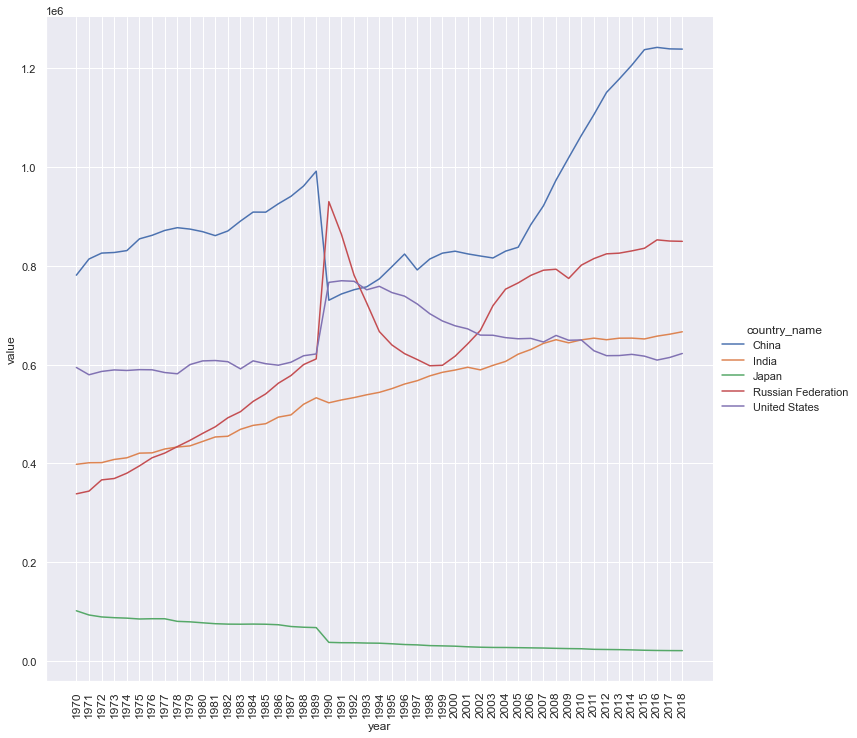

In [150]:
sns.set(rc = {'figure.figsize':(15,15)})
sns.set(font_scale=1)
#sns.set(font_scale=0.5)

g=sns.relplot(x=df_new_ch4.index,y=df_new_ch4.value,hue=df_new_ch4.country_name,height=10,kind='line')
plt.xticks(size=12,rotation=90)
plt.show()

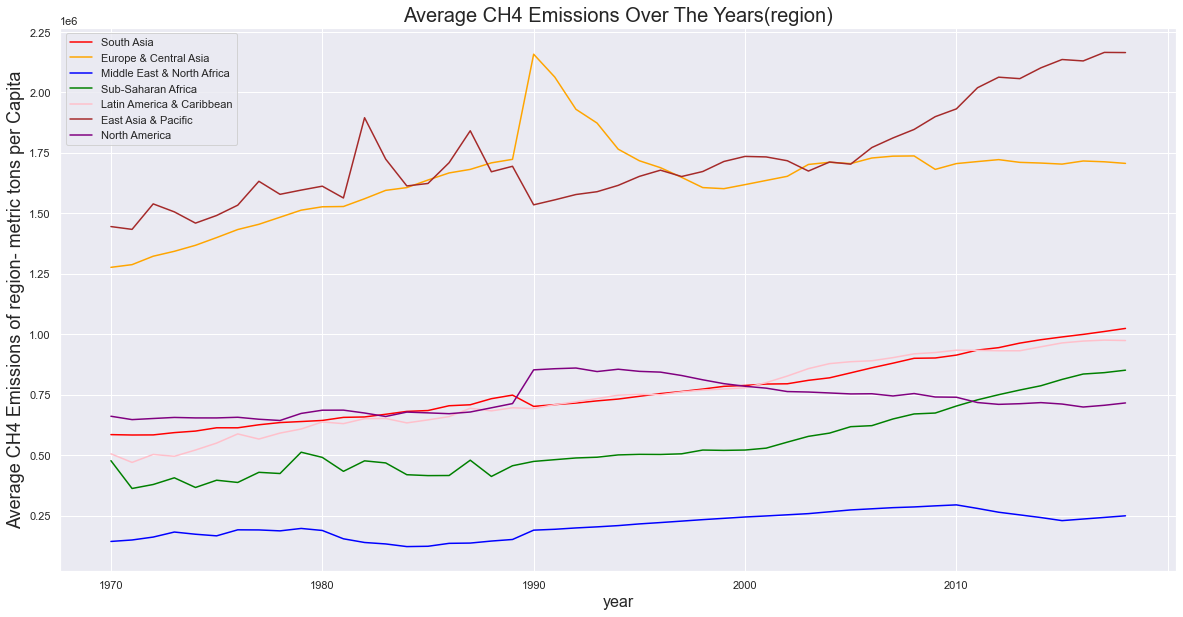

In [151]:
fig, ax = plt.subplots(figsize = (20,10))
#co2_merged_clean.groupby("year")["value"].mean().plot(ax = ax, color = "black", label = "Worldwide")
ch4_merged_clean[ch4_merged_clean["region"] == "South Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "South Asia")
ch4_merged_clean[ch4_merged_clean["region"] == "Europe & Central Asia"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Europe & Central Asia")
ch4_merged_clean[ch4_merged_clean["region"] == "Middle East & North Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Middle East & North Africa")
ch4_merged_clean[ch4_merged_clean["region"] == "Sub-Saharan Africa"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Sub-Saharan Africa")
ch4_merged_clean[ch4_merged_clean["region"] == "Latin America & Caribbean"].groupby("year")["value"].sum().plot(ax = ax, color = "pink", label = "Latin America & Caribbean")
ch4_merged_clean[ch4_merged_clean["region"] == "East Asia & Pacific"].groupby("year")["value"].sum().plot(ax = ax, color = "brown", label = "East Asia & Pacific")
ch4_merged_clean[ch4_merged_clean["region"] == "North America"].groupby("year")["value"].sum().plot(ax = ax, color = "purple", label = "North America")

plt.xlabel("year", fontsize = 16)
plt.ylabel("Average CH4 Emissions of region- metric tons per Capita", fontsize = 18) #y축이 의미하는 바 고쳐야함
plt.title("Average CH4 Emissions Over The Years(region)", fontsize = 20) #제목 바꿔야함. 
plt.legend(fontsize = 11,loc='upper left')
plt.show()

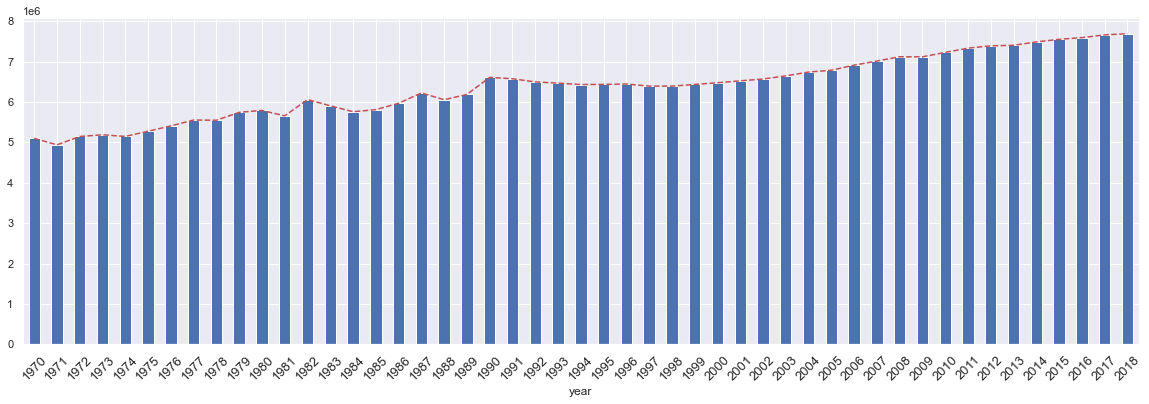

In [152]:
#연도별 ch4배출량의 sum으로
plot_ch4_year= ch4_merged_clean.groupby("year")["value"].sum() 
plt.figure(figsize = (20,6))
plot_ch4_year.plot(kind='bar',rot=0)
plot_ch4_year.plot(kind='line',color='r',linestyle='--')
plt.xticks(rotation=45,size=13)
plt.show()

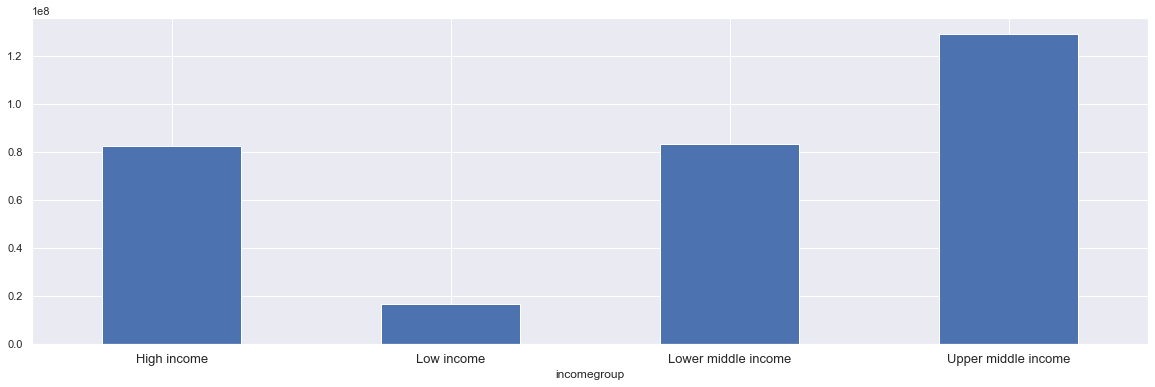

In [153]:
#income group별 ch4배출량의 합
plot_ch4_income= ch4_merged_clean.groupby("incomegroup")["value"].sum()
plt.figure(figsize = (20,6))
plot_ch4_income.plot(kind='bar',rot=0)
plt.xticks(size=13)
plt.show()

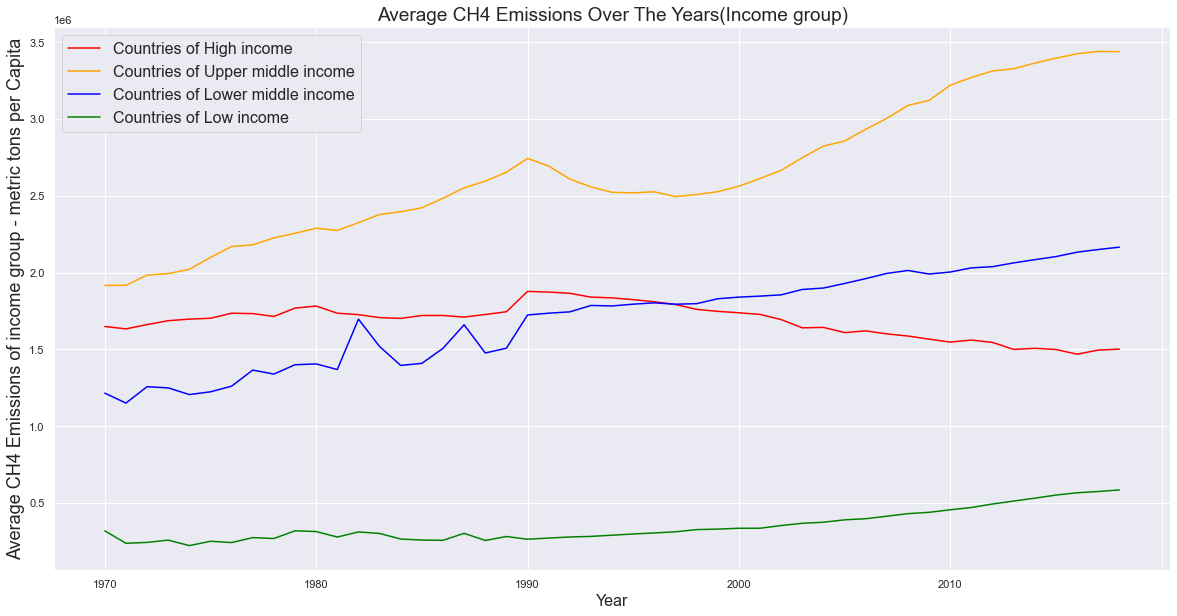

In [154]:
fig, ax = plt.subplots(figsize = (20,10))
#co2_merged_clean.groupby("year")["value"].mean().plot(ax = ax, color = "black", label = "Worldwide")
ch4_merged_clean[ch4_merged_clean["incomegroup"] == "High income"].groupby("year")["value"].sum().plot(ax = ax, color = "red", label = "Countries of High income")
ch4_merged_clean[ch4_merged_clean["incomegroup"] == "Upper middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "orange", label = "Countries of Upper middle income")
ch4_merged_clean[ch4_merged_clean["incomegroup"] == "Lower middle income"].groupby("year")["value"].sum().plot(ax = ax, color = "blue", label = "Countries of Lower middle income")
ch4_merged_clean[ch4_merged_clean["incomegroup"] == "Low income"].groupby("year")["value"].sum().plot(ax = ax, color = "green", label = "Countries of Low income")
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average CH4 Emissions of income group - metric tons per Capita", fontsize = 18)
plt.title("Average CH4 Emissions Over The Years(Income group)", fontsize = 19) 
plt.legend(fontsize = 16,loc='upper left')
plt.show()

In [155]:
ch4_raw_data=pd.read_csv('./dataset/API_EN.ATM.METH.KT.CE_DS2_en_csv_v2_3161021-methane emissions.csv')
ch4_raw_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,523850.0,534240.0,538060.0,543720.0,554570.0,563050.0,564380.0,570040.0,NaN,NaN
2,Afghanistan,AFG,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,39480.0,48780.0,58130.0,67770.0,76590.0,78150.0,79610.0,81510.0,NaN,NaN
3,Africa Western and Central,AFW,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,327790.0,336470.0,348150.0,356630.0,368640.0,383250.0,386400.0,392130.0,NaN,NaN
4,Angola,AGO,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,38100.0,37110.0,37420.0,36700.0,37180.0,37400.0,37450.0,35520.0,NaN,NaN


In [156]:
livestock_raw_data=pd.read_csv('./dataset/가축생산량_쇠고기__20211124144555.csv', encoding='euc-kr')
livestock_raw_data.head()

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,World,45565944,45953128,45914058,47159800,48483781,49306824,50983632,50940348,51339867,...,62646774,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Korea, Rep.",93000,69000,61000,66000,90000,118000,153000,158000,133000,...,186000,216000,234000,260000,261000,255000,231000,239000,237000,245000
3,Afghanistan,67000,68000,69000,68000,68000,68000,68000,70000,71000,...,131000,138000,139000,134000,120545,111438,106054,95229,91920,95398
4,Albania,-,-,-,-,-,-,-,-,-,...,48000,48200,47600,53600,59000,63600,68100,70800,68800,68100


In [157]:
ch4_world=ch4_raw_data[ch4_raw_data['Country Code']=='WLD']

In [158]:
livestock_world=livestock_raw_data[livestock_raw_data['Country Name']=='World']

In [159]:
livestock_world['Indicator Name']=['livestock production volume']

In [160]:
ch4_world

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,World,WLD,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,7807040.0,7869970.0,7880460.0,7957650.0,8021410.0,8068580.0,8137390.0,8174420.0,NaN,NaN


In [161]:
livestock_world

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Indicator Name
0,World,45565944,45953128,45914058,47159800,48483781,49306824,50983632,50940348,51339867,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,livestock production volume


In [162]:
merged_ch4_livestock=pd.concat([ch4_world,livestock_world],axis=0)
merged_ch4_livestock

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,World,WLD,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,7.80704e+06,7.86997e+06,7.88046e+06,7.95765e+06,8.02141e+06,8.06858e+06,8.13739e+06,8.17442e+06,NaN,NaN
0,World,NaN,livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [163]:
merged_ch4_livestock.reset_index(drop=True)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,World,WLD,Methane emissions (kt of CO2 equivalent),EN.ATM.METH.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,...,7.80704e+06,7.86997e+06,7.88046e+06,7.95765e+06,8.02141e+06,8.06858e+06,8.13739e+06,8.17442e+06,NaN,NaN
1,World,NaN,livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [164]:
merged_ch4_livestock.drop(['Country Name','Country Code','Indicator Code'],axis=1,inplace=True)
merged_ch4_livestock

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,Methane emissions (kt of CO2 equivalent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.80704e+06,7.86997e+06,7.88046e+06,7.95765e+06,8.02141e+06,8.06858e+06,8.13739e+06,8.17442e+06,NaN,NaN
0,livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [165]:
merged_ch4_livestock.set_index('Indicator Name',inplace=True)
merged_ch4_livestock

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Indicator Name,,,,,,,,,,,,,,,,,,,,,
Methane emissions (kt of CO2 equivalent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.80704e+06,7.86997e+06,7.88046e+06,7.95765e+06,8.02141e+06,8.06858e+06,8.13739e+06,8.17442e+06,NaN,NaN
livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [166]:
merged_ch4_livestock.reset_index()

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Methane emissions (kt of CO2 equivalent),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.80704e+06,7.86997e+06,7.88046e+06,7.95765e+06,8.02141e+06,8.06858e+06,8.13739e+06,8.17442e+06,NaN,NaN
1,livestock production volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62365818,62930978,63961185,64367040,63847528,64358236,65591737,67320903,68313894,NaN


In [167]:
transpose_merged_ch4_livestock=merged_ch4_livestock.transpose()
transpose_merged_ch4_livestock

Indicator Name,Methane emissions (kt of CO2 equivalent),livestock production volume
1960,NaN,NaN
1961,NaN,NaN
1962,NaN,NaN
1963,NaN,NaN
1964,NaN,NaN
...,...,...
2016,8.06858e+06,64358236
2017,8.13739e+06,65591737
2018,8.17442e+06,67320903
2019,NaN,68313894


In [168]:
transpose_merged_ch4_livestock.dropna(axis=0,inplace=True)
transpose_merged_ch4_livestock

Indicator Name,Methane emissions (kt of CO2 equivalent),livestock production volume
1980,5.99792e+06,45565944
1981,5.858e+06,45953128
1982,6.2754e+06,45914058
1983,6.12652e+06,47159800
1984,5.9732e+06,48483781
1985,6.02538e+06,49306824
1986,6.18497e+06,50983632
1987,6.44942e+06,50940348
1988,6.27621e+06,51339867
1989,6.41617e+06,51557846


In [169]:
series1=transpose_merged_ch4_livestock['Methane emissions (kt of CO2 equivalent)'].astype(int)
series2=transpose_merged_ch4_livestock['livestock production volume'].astype(int)
final_ch4_livestock=pd.concat([series1,series2],axis=1)

In [170]:
final_ch4_livestock

,Methane emissions (kt of CO2 equivalent),livestock production volume
1980,5997921,45565944
1981,5858004,45953128
1982,6275398,45914058
1983,6126518,47159800
1984,5973200,48483781
1985,6025375,49306824
1986,6184970,50983632
1987,6449419,50940348
1988,6276209,51339867
1989,6416172,51557846


In [171]:
final_ch4_livestock.rename(columns={'Methane emissions (kt of CO2 equivalent)':'CH4','livestock production volume':'livestock'},inplace=True)
final_ch4_livestock

,CH4,livestock
1980,5997921,45565944
1981,5858004,45953128
1982,6275398,45914058
1983,6126518,47159800
1984,5973200,48483781
1985,6025375,49306824
1986,6184970,50983632
1987,6449419,50940348
1988,6276209,51339867
1989,6416172,51557846


In [172]:
final_ch4_livestock.describe()

,CH4,livestock
count,3.900000e+01,3.900000e+01
mean,7.011092e+06,5.611803e+07
std,6.777473e+05,6.150793e+06
min,5.858004e+06,4.556594e+07
25%,6.599524e+06,5.175370e+07
50%,6.875120e+06,5.529346e+07
75%,7.588570e+06,6.230975e+07
max,8.174420e+06,6.732090e+07


In [173]:
corr=final_ch4_livestock[['CH4','livestock']].corr(method='pearson')
corr

,CH4,livestock
CH4,1.000000,0.974975
livestock,0.974975,1.000000


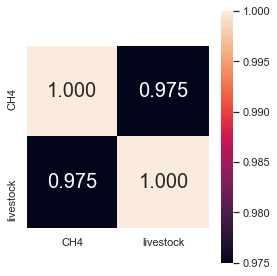

<Figure size 216x216 with 0 Axes>

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_view = ['CH4','livestock']
plt.figure(figsize=(4,4))
sns.set(font_scale=1)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.3f',
                annot_kws = {'size': 20},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.figure(figsize=(3,3))
plt.show()

# 재생에너지 현황

In [175]:
global_renewable = pd.read_csv('./dataset/modern-renewable-energy-consumption.csv')
global_renewable = global_renewable[global_renewable['Entity']=='World']

In [176]:
renewable_y = ['Hydro Generation - TWh', 'Wind Generation - TWh', 
               'Solar Generation - TWh', 'Geo Biomass Other - TWh']

fig = px.area(global_renewable, x="Year", y=renewable_y, title='Renewable Energy Generation, World',
             labels={'value':'measured on terawatt-hours (TWh)'})

fig.show()

In [177]:
renewable_energy_value=pd.read_csv('./dataset/API_EG.FEC.RNEW.ZS_DS2_en_csv_v2_3160040_renewable_energy.csv')
renewable_energy_value.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.6993,8.024100,NaN,NaN
1,Africa Eastern and Southern,AFE,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,62.293842,61.109554,60.468838,60.803934,61.097264,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.0828,21.422701,NaN,NaN
3,Africa Western and Central,AFW,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,79.525293,79.071007,77.544229,76.276143,76.967527,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Renewable energy consumption (% of total final...,EG.FEC.RNEW.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.1805,56.785500,NaN,NaN


In [178]:
renewable_energy_value.shape

(266, 65)

In [179]:
renewable_energy_value.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

In [180]:
renewable_energy_value.drop(columns=['Indicator Name','Indicator Code','1960','1961',
                       '1962','1963','1964','1965','1966','1967',
                       '1968','1969','1970','1971','1972','1973','1974','1975',
                       '1976','1977','1978','1979','1980','1981','1982',
                       '1983','1984','1985','1986','1987','1988','1989','2019','2020'],axis=1,inplace=True)

In [181]:
renewable_energy_value.shape

(266, 31)

In [182]:
renewable_energy_value.columns=change_col(renewable_energy_value.columns)

In [183]:
renewable_energy_value.iloc[:,2:] = renewable_energy_value.iloc[:,2:].fillna(method='bfill',axis=1)
f_renewable_energy_value_data=renewable_energy_value
#final_co2_value_data=f_co2_value_data.fillna(method='bfill',axis=0,inplace=True)

In [184]:
f_renewable_energy_value_data.head(5)

,country_name,country_code,1990,1991,1992,1993,1994,1995,1996,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,0.268747,0.234955,0.238778,0.195134,0.183241,0.173372,0.167474,0.160096,...,0.299800,5.464700,5.661800,6.855900,6.889700,6.927500,6.728000,6.994600,6.6993,8.024100
1,Africa Eastern and Southern,AFE,61.625965,62.876319,64.636541,65.291676,65.379764,64.982510,64.218668,63.385625,...,61.252554,62.564529,62.293842,61.109554,60.468838,60.803934,61.097264,NaN,NaN,NaN
2,Afghanistan,AFG,15.924532,17.036444,26.521629,30.585667,32.796251,35.075640,37.945747,41.432601,...,17.850401,14.899000,11.559100,14.404900,17.105000,20.770300,20.273800,24.740299,25.0828,21.422701
3,Africa Western and Central,AFW,86.082214,85.443014,83.983071,85.305307,86.763667,86.348199,85.281256,83.947937,...,82.615425,80.933623,79.525293,79.071007,77.544229,76.276143,76.967527,NaN,NaN,NaN
4,Angola,AGO,72.255252,71.888639,72.723283,71.277056,72.220269,73.945888,73.139600,73.734416,...,52.413898,50.764801,49.239201,49.443298,47.938499,48.211300,47.815601,49.008099,56.1805,56.785500


In [185]:
f_renewable_energy_value_data.iloc[:,2:] = f_renewable_energy_value_data.iloc[:,2:].fillna(method='ffill',axis=1)
final_renewable_energy_value_data=f_renewable_energy_value_data

In [186]:
final_renewable_energy_value_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  266 non-null    object 
 1   country_code  266 non-null    object 
 2   1990          261 non-null    float64
 3   1991          261 non-null    float64
 4   1992          261 non-null    float64
 5   1993          261 non-null    float64
 6   1994          261 non-null    float64
 7   1995          261 non-null    float64
 8   1996          261 non-null    float64
 9   1997          261 non-null    float64
 10  1998          261 non-null    float64
 11  1999          261 non-null    float64
 12  2000          261 non-null    float64
 13  2001          261 non-null    float64
 14  2002          261 non-null    float64
 15  2003          261 non-null    float64
 16  2004          261 non-null    float64
 17  2005          261 non-null    float64
 18  2006          261 non-null    

In [187]:
year_data_renewable_energy=final_renewable_energy_value_data.iloc[:,2:]

In [188]:
cols3=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002',
      '2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014',
      '2015','2016','2017','2018']

In [189]:
zero_list3=[]
for col in cols3:
    idx3=year_data_renewable_energy[year_data_renewable_energy[col]<0].index
    
    if (len(idx3))>0:
        zero_list.append(idx3)

In [190]:
zero_list3 #음수값 없음. 

[]

In [191]:
final_renewable_energy_value_data=final_renewable_energy_value_data[final_renewable_energy_value_data['country_name'].isin(country_list)]
final_renewable_energy_value_data.shape

(152, 31)

In [192]:
#1998년도
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        #colorscale = metricscale1,
        color='continent',
        showscale = True,
        locations = final_renewable_energy_value_data['country_name'].values,
        z = final_renewable_energy_value_data['1998'].values,
        locationmode = 'country names',
        text = final_renewable_energy_value_data['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,225)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Renewable Energy\nRate')
            )
       ]

layout = dict(
    title = 'World Map of renewable energy rates in the Year 1998',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        #oceancolor = 'rgb(222,243,246)',
        projection = dict(
        type = 'natural earth',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap1998')

#metricscale2=[[0, 'rgb(102,194,165)'], [0.05, 'rgb(102,194,165)'], 
#              [0.15, 'rgb(171,221,164)'], [0.2, 'rgb(230,245,152)'], 
#              [0.25, 'rgb(255,255,191)'], [0.35, 'rgb(254,224,139)'], 
#              [0.45, 'rgb(253,174,97)'], [0.55, 'rgb(213,62,79)'], [1.0, 'rgb(158,1,66)']]
data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        #colorscale = metricscale2,
        color='continent',
        showscale = True,
        locations = final_renewable_energy_value_data['country_name'].values,
        z = final_renewable_energy_value_data['2008'].values,
        locationmode = 'country names',
        text = final_renewable_energy_value_data['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Renewable Energy\nRate')
            )
       ]

layout = dict(
    title = 'World Map of renewable energy in the Year 2008',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'nautral earth',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)',
                width = '0.05'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2008')

data = [ dict(
        type = 'choropleth',
        autocolorscale = False,
        #colorscale = metricscale2,
        color='continent',
        showscale = True,
        locations = final_renewable_energy_value_data['country_name'].values,
        z = final_renewable_energy_value_data['2018'].values,
        locationmode = 'country names',
        text = final_renewable_energy_value_data['country_name'].values,
        marker = dict(
            line = dict(color = 'rgb(250,250,200)', width = 0.5)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Renewable Energy\nRate')
            )
       ]

layout = dict(
    title = 'World Map of renewable energy in the Year 2018',
    geo = dict(
        showframe = True,
        showocean = True,
        oceancolor = 'rgb(28,107,160)',
        projection = dict(
        type = 'nautral earth',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)',
                width = '0.05'
            ),
        lataxis = dict(
                showgrid = False,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap2018')

In [193]:
# I first create an array containing the net movement in the unemployment rate.
diff_2018_1998= final_renewable_energy_value_data['2018'].values - final_renewable_energy_value_data['1998'].values
diff_2018_2008=final_renewable_energy_value_data['2018'].values - final_renewable_energy_value_data['2008'].values
diff_2008_1998=final_renewable_energy_value_data['2008'].values - final_renewable_energy_value_data['1998'].values

In [194]:
x, y = (list(x) for x in zip(*sorted(zip(diff_2018_1998, final_renewable_energy_value_data['country_name'].values), 
                                                            reverse = True)))

# Now I want to extract out the top 15 and bottom 15 countries 

#Y = np.concatenate([y[0:15], y[-16:-1]])
#X = np.concatenate([x[0:15], x[-16:-1]])
x2,y2=(list(x) for x in zip(*sorted(zip(diff_2018_2008, final_renewable_energy_value_data['country_name'].values), 
                                                            reverse = True)))
x3,y3=(list(x) for x in zip(*sorted(zip(diff_2008_1998, final_renewable_energy_value_data['country_name'].values), 
                                                            reverse = True)))

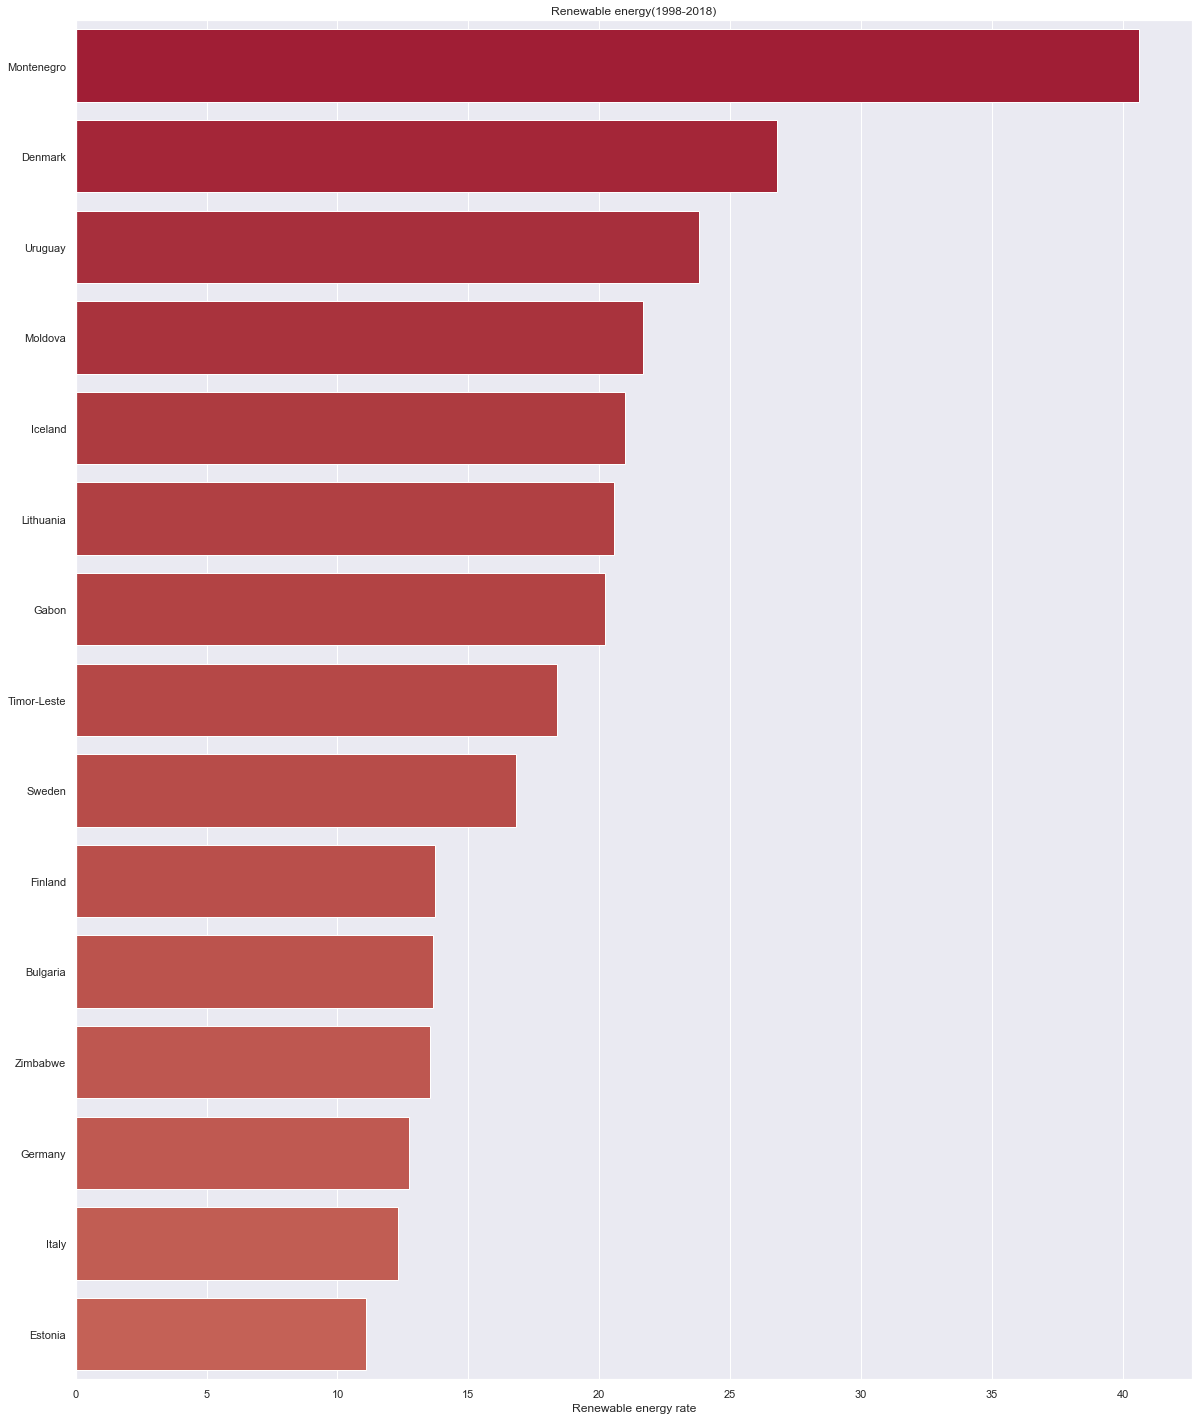

In [195]:
# Plot using Seaborn's barplot
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(20, 25))
colors_cw = sns.color_palette('coolwarm', len(x))
#sns.barplot(X, Y, palette = colors_cw[::-1])
sns.barplot(x[0:15], y[0:15], palette = colors_cw[::-1])
Text = ax.set(xlabel='Renewable energy rate', 
              title='Renewable energy(1998-2018)')

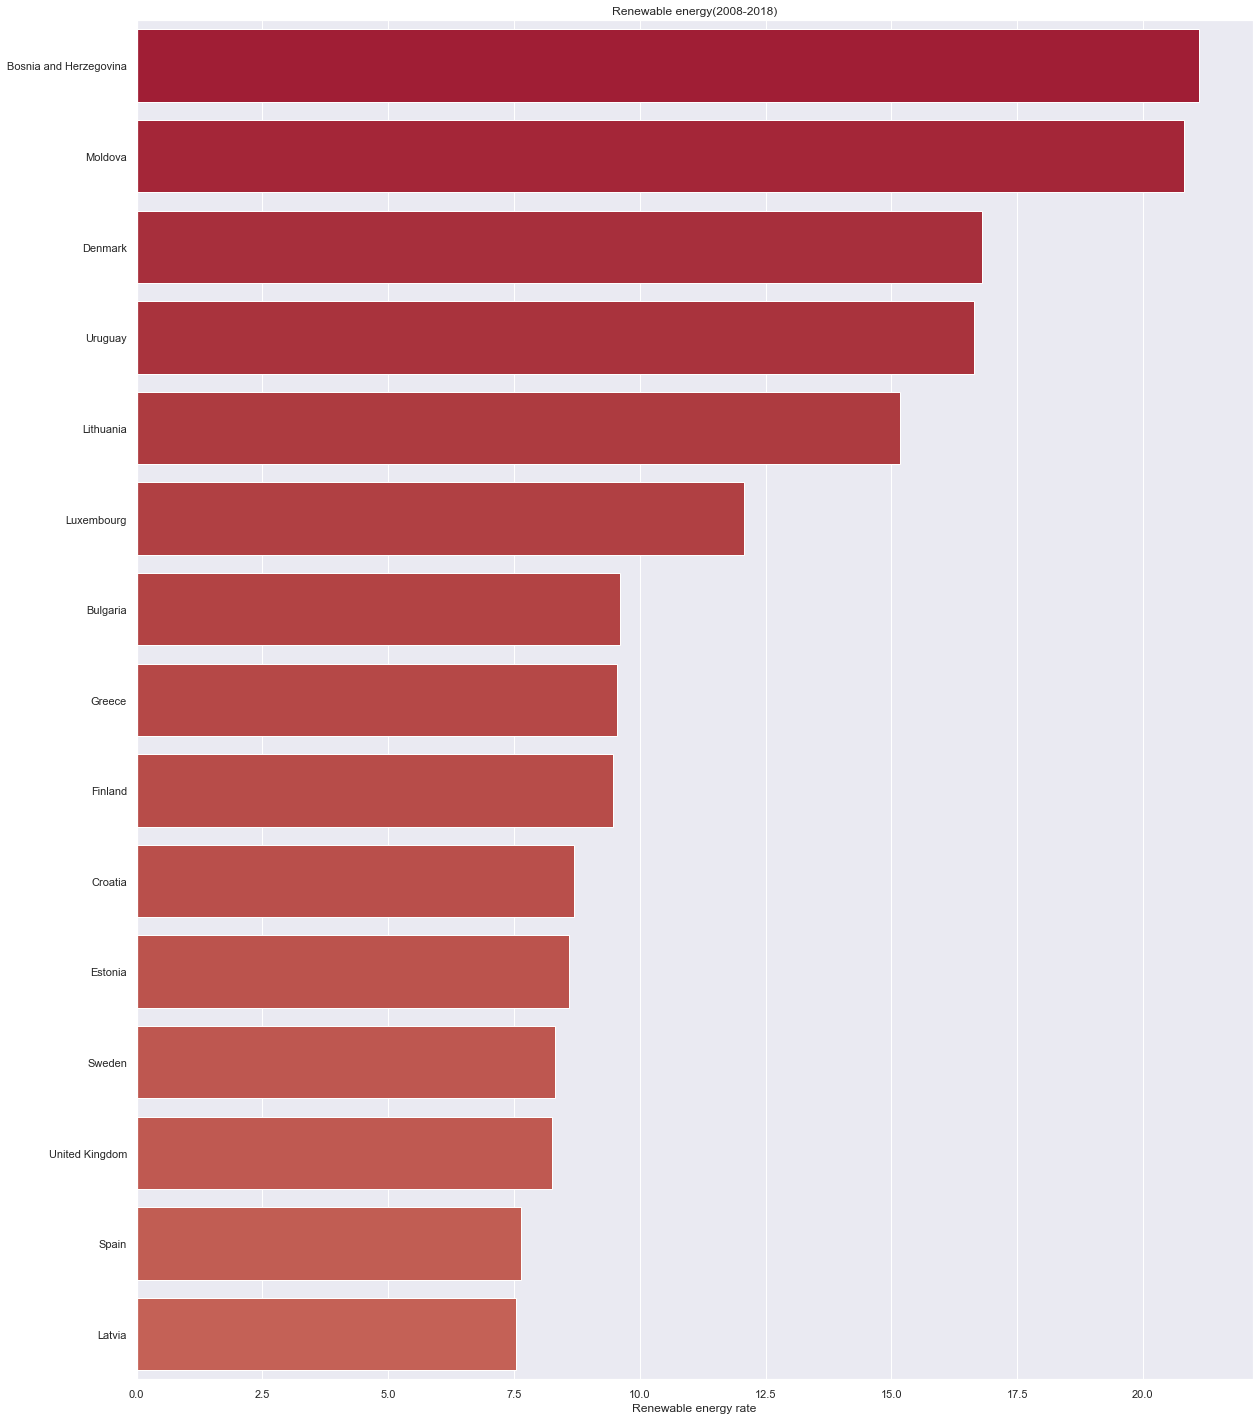

In [196]:
# Plot using Seaborn's barplot
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(20, 25))
colors_cw = sns.color_palette('coolwarm', len(x2))
#sns.barplot(X, Y, palette = colors_cw[::-1])
sns.barplot(x2[0:15], y2[0:15], palette = colors_cw[::-1])
Text = ax.set(xlabel='Renewable energy rate', 
              title='Renewable energy(2008-2018)')

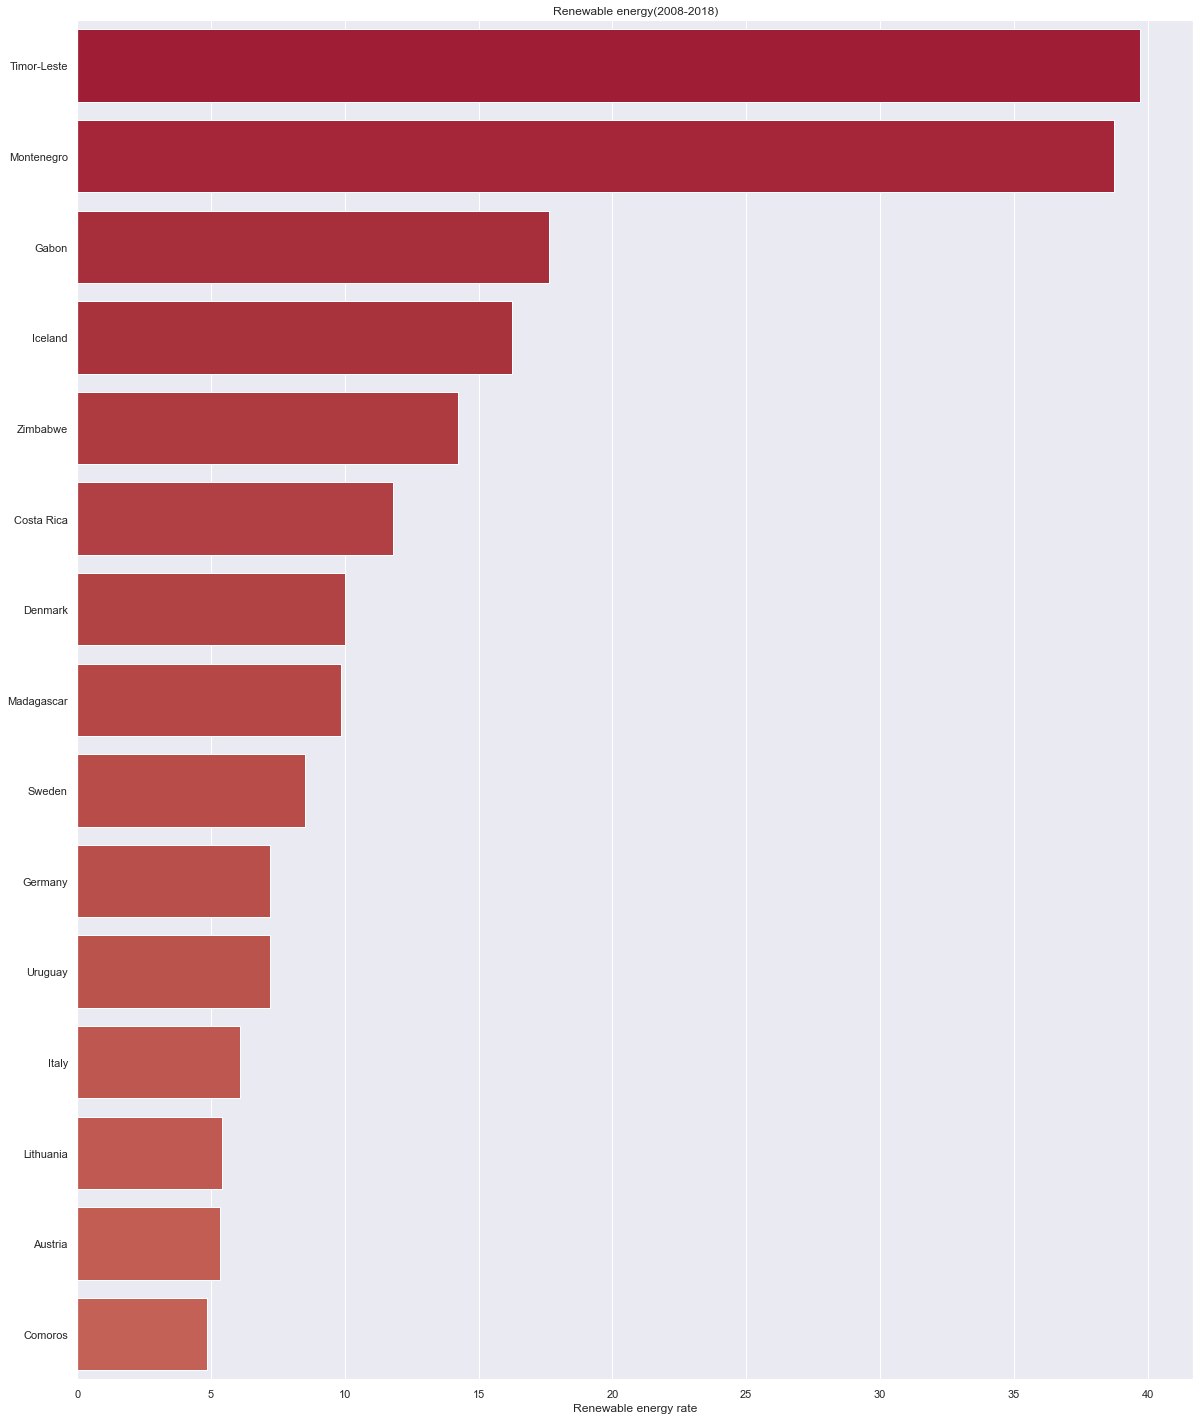

In [197]:
# Plot using Seaborn's barplot
sns.set(font_scale=1) 
f, ax = plt.subplots(figsize=(20, 25))
colors_cw = sns.color_palette('coolwarm', len(x3))
#sns.barplot(X, Y, palette = colors_cw[::-1])
sns.barplot(x3[0:15], y3[0:15], palette = colors_cw[::-1])
Text = ax.set(xlabel='Renewable energy rate', 
              title='Renewable energy(2008-2018)')